In [1]:
# set up 
lunarc = 0
dim = 2 # TODO this argument should be used to set the dim
seed = list(range(1,51))
seed_data = 7

import os

print(os.getcwd())

# set the wd to the base folder for the project
if lunarc == 1:
    os.chdir('/home/samwiq/spa/seq-posterior-approx-w-nf-dev/lotka_volterra')
else:
    os.chdir('/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/lotka_volterra')

print(os.getcwd())

import matplotlib.pyplot as plt
import numpy as np

import random


/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/lotka_volterra
/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/lotka_volterra


In [2]:
# set width to full screen 
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# set style 
plt.style.use('seaborn')
plt.rcParams['lines.markeredgewidth'] = 1

# only use type 1 fonts in figures
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True

In [3]:
seed_max = 10

## Present results 

Set functions to load results 

In [4]:
def read_res_file(path):
    f =  open(path, 'r')
    data =  f.readlines()
    f.close 
    return list(map(float,data))

# this func. is used to read both the posteiro sames and the data samples 
def read_posterior_samples(p):
    return np.loadtxt(p, delimiter=",")


Load results 

In [5]:
smcabc_res = np.zeros((11, seed_max))

for i in range(seed_max):
    id_job = str(i+1) + '_' + str(seed_data)
    p = 'results/abcsmc_' + id_job + '.txt'
    smcabc_res[:,i] = read_res_file(p)

In [6]:
snl_res = np.zeros((7, seed_max))

for i in range(seed_max):
    #if i != 7:
    id_job = str(i+1) + '_' + str(seed_data)
    p = 'results/snl_' + id_job + '.txt'
    snl_res[:,i] = read_res_file(p)

In [7]:
snpe_c_res = np.zeros((7, seed_max))

for i in range(seed_max):
    id_job = str(i+1) + '_' + str(seed_data)
    p = 'results/snpec_' + id_job + '.txt'
    snpe_c_res[:,i] = read_res_file(p)

In [8]:
snre_b_res = np.zeros((7, seed_max))

for i in range(seed_max):
    id_job = str(i+1) + '_' + str(seed_data)
    p = 'results/snre_b_' + id_job + '.txt'
    snre_b_res[:,i] = read_res_file(p)

In [9]:
spa_flow_res = np.zeros((7, seed_max))

for i in range(seed_max):
    id_job = str(i+1) + '_' + str(seed_data)
    p = 'results/spa_flow_' + id_job + '.txt'
    spa_flow_res[:,i] = read_res_file(p)

Load results from SMC runs (i.e. res from EasyABC)

In [10]:
p = 'data/easy_abc_1k_post_samples.txt'
easyabc_post = np.loadtxt(p, delimiter=" ")[:,1:5] # load and select col 2-4

Calc log-probs for easyabc 

In [11]:
import LotkaVolterra
import torch
import functions as func  # Set model and generate data
x_o, model, theta_true = func.set_up_model()

easyabc_gauss_approx = func.fit_gaussian_dist(torch.from_numpy(easyabc_post))  # to get correct prob

In [12]:
print("EasyABC, neg log-prob: " + str(-easyabc_gauss_approx.log_prob(theta_true)))


EasyABC, neg log-prob: tensor(23.9460)


Runtime (training) (sec)

In [13]:
print("SMC-ABC: " + str(smcabc_res[0,:].mean().round(4)))
print("SNL: " + str(snl_res[0,:].mean().round(4)))
print("SNPE-C: " + str(snpe_c_res[0,:].mean().round(4)))
print("SNRE-B: " + str(snre_b_res[0,:].mean().round(4)))
print("SPA-Flow: " + str(spa_flow_res[0,:].mean().round(4)))

SMC-ABC: 391.3429
SNL: 7111.6349
SNPE-C: 4122.8871
SNRE-B: 6004.7544
SPA-Flow: 4143.0447


Runtime (inference, i.e. gen. 1000 samples from the res. posterior) (sec)

In [14]:
print("SMC-ABC: " + "NA")
print("SNL: " + str(snl_res[1,:].mean().round(4)))
print("SNPE-C: " + str(snpe_c_res[1,:].mean().round(4)))
print("SNRE-B: " + str(snre_b_res[1,:].mean().round(4)))
print("SPA-Flow: " + str(spa_flow_res[1,:].mean().round(4)))

SMC-ABC: NA
SNL: 2586.6026
SNPE-C: 0.1015
SNRE-B: 168.503
SPA-Flow: 0.0453


Neg log-prob between approx. posterior and analytical posterior

In [15]:
print("SMC-ABC: " + str(smcabc_res[-1,:].mean().round(4)))
print("SNL: " + str(snl_res[-1,:].mean().round(4)))
print("SNPE-C: " + str(snpe_c_res[-1,:].mean().round(4)))
print("SNRE-B: " + str(snre_b_res[-1,:].mean().round(4)))
print("SPA-Flow: " + str(spa_flow_res[-1,:].mean().round(4)))

SMC-ABC: 7.2972
SNL: -1.5793
SNPE-C: -3.5105
SNRE-B: -3.1173
SPA-Flow: -2.3115


In [16]:
print("SMC-ABC: " + str(np.median(smcabc_res[-1,:]).round(4)))
print("SNL: " + str(np.median(snl_res[-1,:]).round(4)))
print("SNPE-C: " + str(np.median(snpe_c_res[-1,:]).round(4)))
print("SNRE-B: " + str(np.median(snre_b_res[-1,:]).round(4)))
print("SPA-Flow: " + str(np.median(spa_flow_res[-1,:]).round(4)))

SMC-ABC: 7.2342
SNL: -1.6153
SNPE-C: -3.475
SNRE-B: -3.0526
SPA-Flow: -2.7417


Band plot for log-prob

In [17]:
x_grid = [1000, 2000, 3000, 4000, 5000]
upper_q = 0.75
lower_w = 0.25

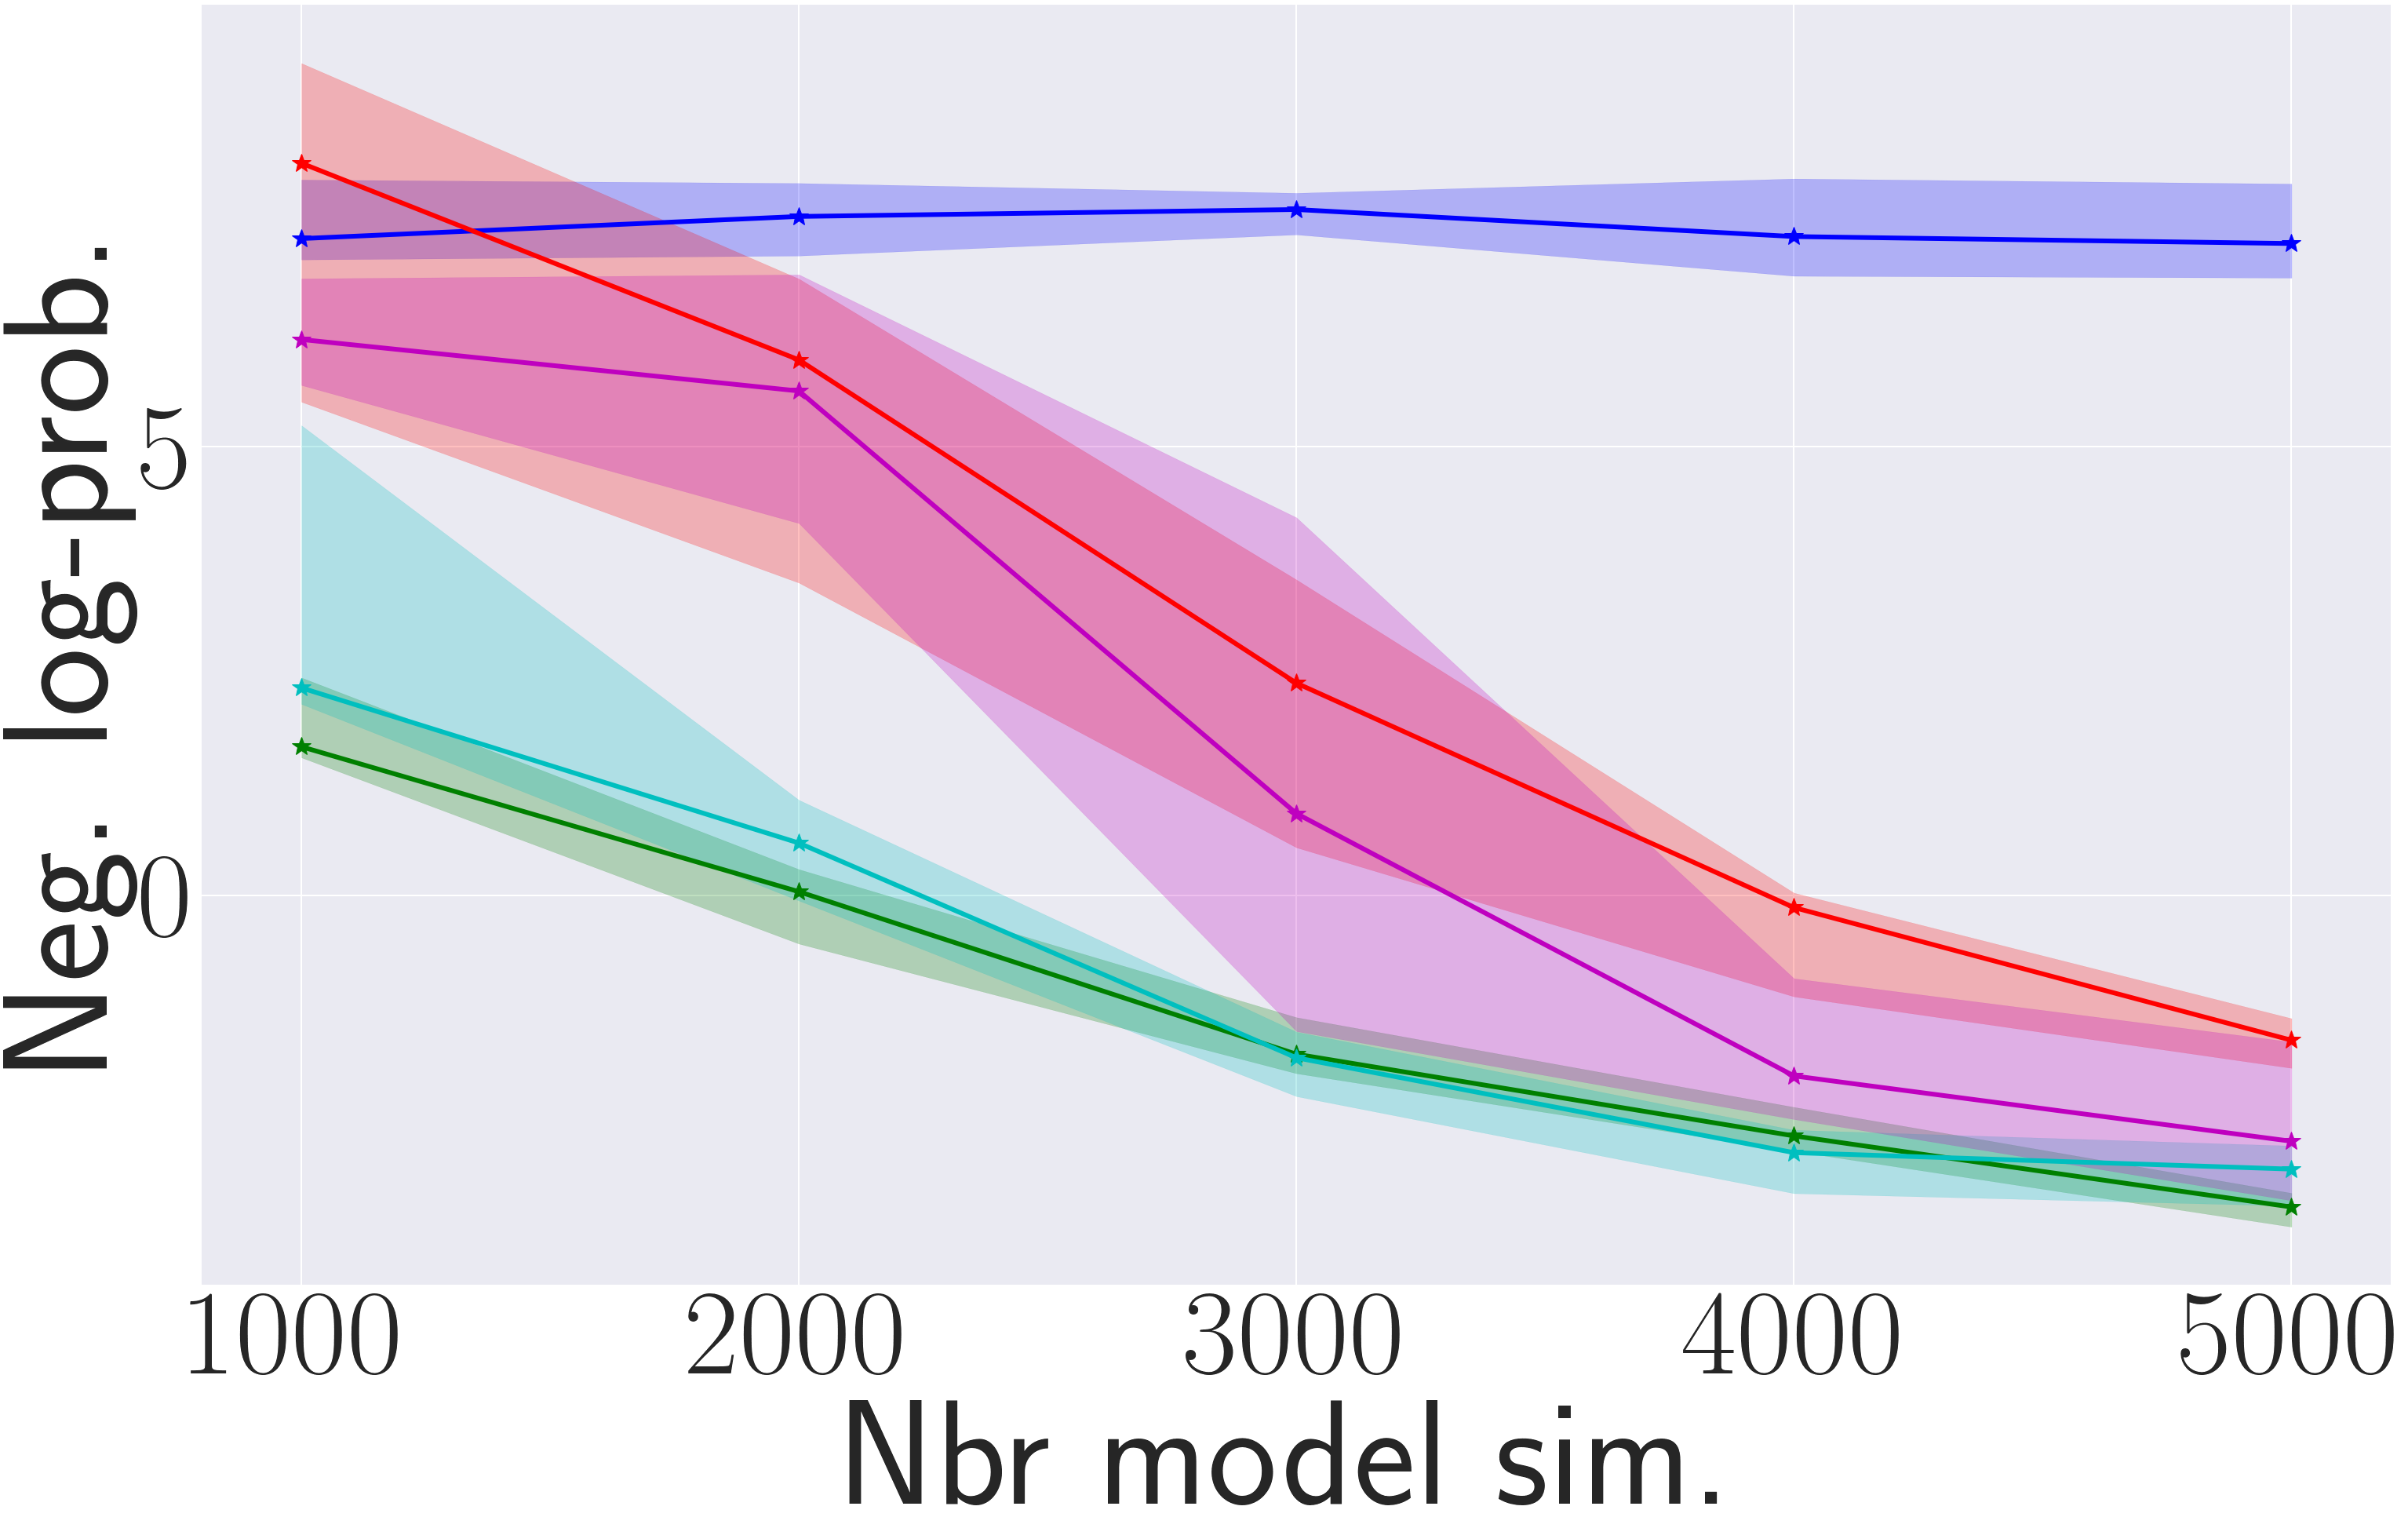

In [98]:
fig = plt.figure(figsize = (50,30))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_grid, np.median(smcabc_res[1:6,:],axis = 1), color = "b",
         label='SMC-ABC',linewidth=6, marker = "*", markersize=25)
ax.fill_between(x_grid, 
                np.quantile(smcabc_res[1:6,:], lower_w, axis = 1), 
                np.quantile(smcabc_res[1:6,:], upper_q, axis = 1), 
                alpha = 0.25, color = "b")


ax.plot(x_grid, np.median(snl_res[2:,:],axis = 1), color = "r",
         label='SNL', linewidth=6, marker = "*", markersize=25)
ax.fill_between(x_grid, 
                np.quantile(snl_res[2:,:], lower_w, axis = 1), 
                np.quantile(snl_res[2:,:], 0.7, axis = 1), 
                alpha = 0.25, color = "r")


ax.plot(x_grid, np.median(snpe_c_res[2:,:],axis = 1), color = "g",
         label='SNPE-C', linewidth=6, marker = "*", markersize=25)
ax.fill_between(x_grid, 
                np.quantile(snpe_c_res[2:,:], lower_w, axis = 1), 
                np.quantile(snpe_c_res[2:,:], upper_q, axis = 1), 
                alpha = 0.25, color = "g")


ax.plot(x_grid, np.median(snre_b_res[2:,:],axis = 1), color = "c",
         label='SNRE-B', linewidth=6, marker = "*", markersize=25)
ax.fill_between(x_grid, 
                np.quantile(snre_b_res[2:,:], lower_w, axis = 1), 
                np.quantile(snre_b_res[2:,:], upper_q, axis = 1), 
                alpha = 0.25, color = "c")

ax.plot(x_grid, np.median(spa_flow_res[2:,:],axis = 1), color = "m",
         label='SNPLA', linewidth=6, marker = "*", markersize=25)
ax.fill_between(x_grid, 
                np.quantile(spa_flow_res[2:,:], lower_w, axis = 1), 
                np.quantile(spa_flow_res[2:,:], upper_q, axis = 1), 
                alpha = 0.25, color = "m")

#ax.plot(x_grid, np.median(spa_flow_gauss_log_probs,axis = 1), "m*-",
#         label='SNPLA', linewidth=6)
#ax.fill_between(x_grid, 
#                np.quantile(spa_flow_gauss_log_probs, lower_w, axis = 1), 
#                np.quantile(spa_flow_gauss_log_probs, upper_q, axis = 1), 
#                alpha = 0.25, color = "m")


ax.grid(color='w', linestyle='-', linewidth=2)
ax.tick_params(axis='both', which='major', labelsize=155)
ax.tick_params(axis='both', which='minor', labelsize=150)
#ax.legend(prop={'size': 90}, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel("Neg. log-prob.", fontsize=190)
ax.set_xlabel("Nbr model sim.", fontsize=190)

plt.savefig("./fig/post_neg_gauss_log_prob.pdf", bbox_inches='tight')


## Plotting

In [19]:
nbr_rounds = 5

In [20]:
smcabc_post = [] # posteriors are stored in snl_post[round][seed]

nbr_sim = [1000,2000,3000,4000,5000]

for i in nbr_sim:    
    smcabc_post_round_i = []
    for j in range(seed_max):
        id_job = str(j+1) + '_' + str(seed_data)
        p = 'data/abcsmc_posterior_' + str(i) + "_"+ id_job + '.csv'
        smcabc_post_round_i.append(read_posterior_samples(p))
            
    smcabc_post.append(smcabc_post_round_i)

In [21]:
snl_post = [] # posteriors are stored in snl_post[round][seed]

for i in range(nbr_rounds):
    snl_post_round_i = []
    for j in range(seed_max):
        #if j != 7:
        id_job = str(j+1) + '_' + str(seed_data)
        p = 'data/snl_posterior_' + str(i+1) + "_"+ id_job + '.csv'
        snl_post_round_i.append(read_posterior_samples(p))

    snl_post.append(snl_post_round_i)

In [22]:
snpe_c_post = [] # posteriors are stored in snl_post[round][seed]

for i in range(nbr_rounds):
    snpe_c_post_round_i = []
    for j in range(seed_max):
        id_job = str(j+1) + '_' + str(seed_data)
        p = 'data/post_samples_snpec_' + str(i+1) + "_"+ id_job + '.csv'
        snpe_c_post_round_i.append(read_posterior_samples(p))
            
    snpe_c_post.append(snpe_c_post_round_i)

In [23]:
snre_b_post = [] # posteriors are stored in snl_post[round][seed]

for i in range(nbr_rounds):
    snre_b_post_round_i = []
    for j in range(seed_max):
        id_job = str(j+1) + '_' + str(seed_data)
        p = 'data/post_samples_snre_b_' + str(i+1) + "_"+ id_job + '.csv'
        snre_b_post_round_i.append(read_posterior_samples(p))
            
    snre_b_post.append(snre_b_post_round_i)

In [24]:
spa_flow_post = [] # posteriors are stored in snl_post[round][seed]

for i in range(nbr_rounds):
    spa_flow_post_round_i = []
    for j in range(seed_max):
        id_job = str(j+1) + '_' + str(seed_data)
        p = 'data/post_samples_spa_flow_' + str(i+1) + "_" + id_job + '.csv'
        spa_flow_post_round_i.append(read_posterior_samples(p))
            
    spa_flow_post.append(spa_flow_post_round_i)

In [25]:
import LotkaVolterra
import functions as func  # Set model and generate data
x_o, model, theta_true = func.set_up_model()


In [26]:
x_sim_at_theta_true = model.model_sim_paths(theta_true.repeat((25,1)))

In [28]:
x_sim_at_theta_true[0].shape

torch.Size([2, 151])

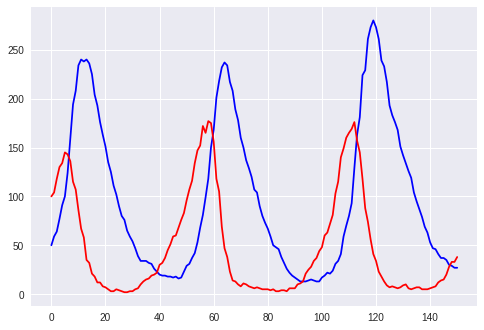

In [29]:
plt.plot(x_o[0,:], "b")
plt.plot(x_o[1,:], "r")

findfont: Font family ['sans-serif'] not found. Falling back to Helvetica.


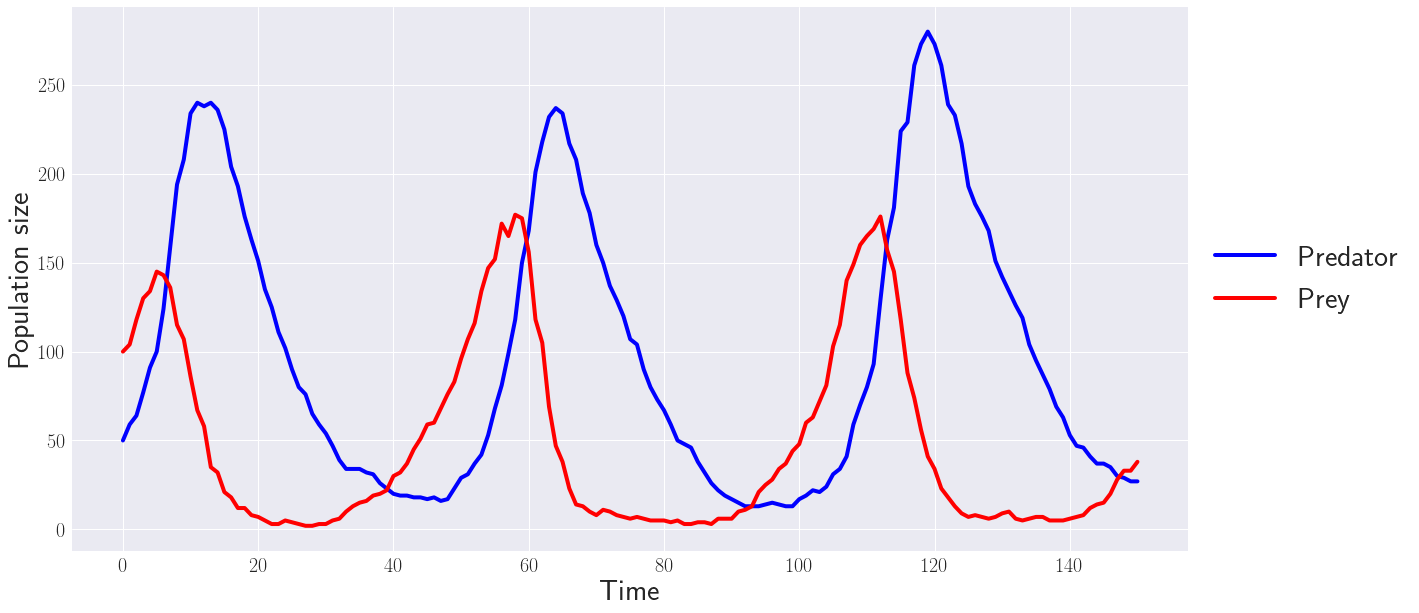

In [27]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_o[0,:], "b", label = "Predator", linewidth=4)
ax.plot(x_o[1,:], "r", label = "Prey", linewidth=4)
ax.set_ylabel("Population size", fontsize=30)
ax.set_xlabel("Time", fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(prop={'size': 30}, loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("./fig/data.pdf", bbox_inches='tight')

In [28]:
m_s_of_prior, s_s_of_prior = func.load_summary_stats_mean_and_std()

In [32]:
m_s_of_prior

tensor([1.6267e+02, 6.4673e+00, 8.0541e-01, 7.1006e-01, 3.6589e+00, 4.4869e+00,
        1.3824e-01, 7.4951e-02, 1.6257e-01])

In [33]:
s_s_of_prior

tensor([4.1518e+02, 2.9077e+00, 2.6436e-01, 3.0191e-01, 1.4910e+01, 9.7989e-01,
        2.6157e-01, 1.8389e-01, 3.8898e-01])

In [29]:
s_x_o = LotkaVolterra.calc_summary_stats(x_o.reshape(1, x_o.shape[0], x_o.shape[1]))
#s_x_o = func.normalize_summary_stats(s_x_o, m_s_of_prior, s_s_of_prior)


In [35]:
print(s_x_o.numpy()[0][0])
print(s_x_o.numpy()[0][1])
print(s_x_o.numpy()[0][2])
print(s_x_o.numpy()[0][3])
print(s_x_o.numpy()[0][4])
print(s_x_o.numpy()[0][5])
print(s_x_o.numpy()[0][6])
print(s_x_o.numpy()[0][7])
print(s_x_o.numpy()[0][8])


99.781456
8.72163
0.9829201
0.94603413
48.066227
7.951863
0.9800173
0.9364019
0.06365246


In [36]:
s_x_o = func.normalize_summary_stats(s_x_o, m_s_of_prior, s_s_of_prior)


In [37]:
print(s_x_o.numpy()[0][0])
print(s_x_o.numpy()[0][1])
print(s_x_o.numpy()[0][2])
print(s_x_o.numpy()[0][3])
print(s_x_o.numpy()[0][4])
print(s_x_o.numpy()[0][5])
print(s_x_o.numpy()[0][6])
print(s_x_o.numpy()[0][7])
print(s_x_o.numpy()[0][8])

-0.15148206
0.77531105
0.6714629
0.78159046
2.9784052
3.5360858
3.2182183
4.684645
-0.25428712


Plot posterior samples

In [30]:
plot_easyabc = False

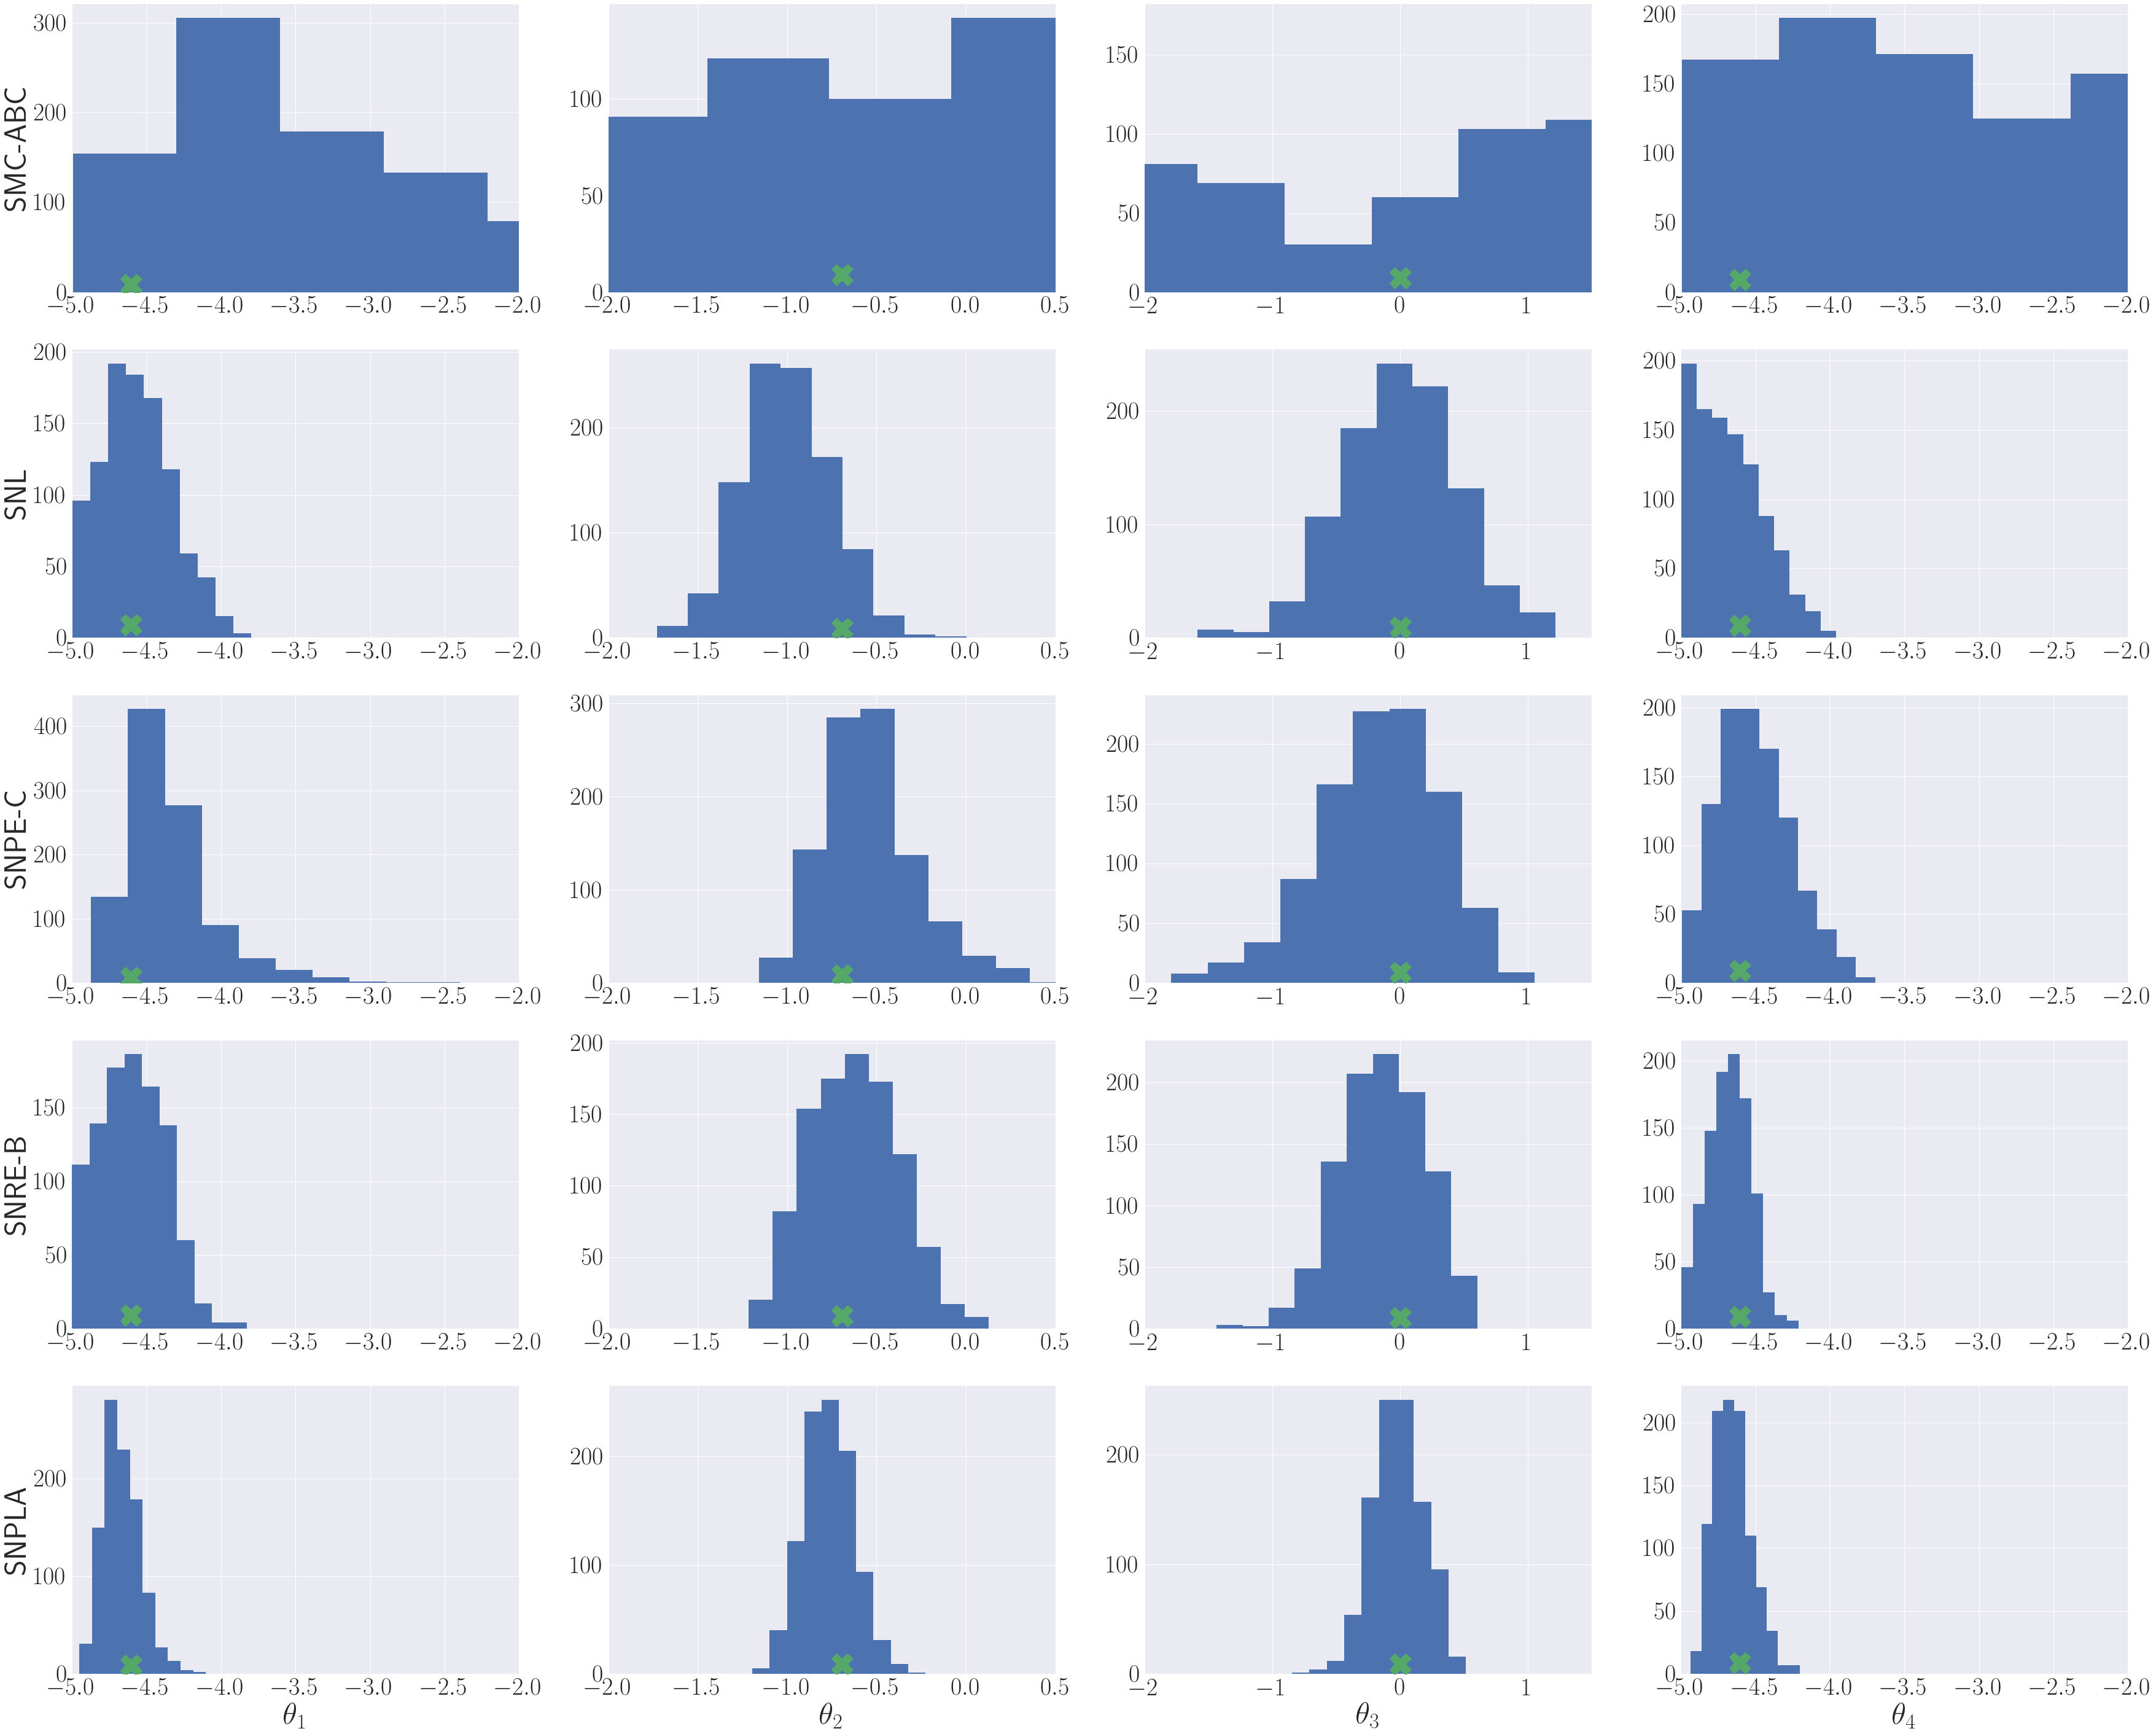

In [103]:
data_set =  1 # data set = 1 very good! 2 not so much...
iter = 5

fig = plt.figure(figsize = (60,50))

ax1 = fig.add_subplot(5, 4, 1)
ax2 = fig.add_subplot(5, 4, 2)#, sharex=ax1)
ax3 = fig.add_subplot(5, 4, 3)#, sharex=ax1)
ax4 = fig.add_subplot(5, 4, 4)#, sharex=ax1)

ax5 = fig.add_subplot(5, 4, 5)#, sharex=ax1)
ax6 = fig.add_subplot(5, 4, 6)#, sharex=ax1)
ax7 = fig.add_subplot(5, 4, 7)#, sharex=ax1)
ax8 = fig.add_subplot(5, 4, 8) #snl_post)#, sharex=ax1)

ax9 = fig.add_subplot(5, 4, 9)#, sharex=ax1)
ax10 = fig.add_subplot(5, 4, 10)#, sharex=ax1)
ax11 = fig.add_subplot(5, 4, 11)#, sharex=ax1)
ax12 = fig.add_subplot(5, 4, 12) #snl_post)#, sharex=ax1)

ax13 = fig.add_subplot(5, 4, 13)#, sharex=ax1)
ax14 = fig.add_subplot(5, 4, 14)#, sharex=ax1)
ax15 = fig.add_subplot(5, 4, 15)#, sharex=ax1)
ax16 = fig.add_subplot(5, 4, 16) #snl_post)#, sharex=ax1)

ax17 = fig.add_subplot(5, 4, 17)#, sharex=ax1)
ax18 = fig.add_subplot(5, 4, 18)#, sharex=ax1)
ax19 = fig.add_subplot(5, 4, 19)#, sharex=ax1)
ax20 = fig.add_subplot(5, 4, 20) #snl_post)#, sharex=ax1)

if plot_easyabc:
    ax1.hist(easyabc_post[:,0])
    ax2.hist(easyabc_post[:,1])
    ax3.hist(easyabc_post[:,2])
    ax4.hist(easyabc_post[:,3])
    ax1.set_ylabel("EasyABC",fontsize=50)

else:
    ax1.hist(smcabc_post[iter-1][data_set][:,0])
    ax2.hist(smcabc_post[iter-1][data_set][:,1])
    ax3.hist(smcabc_post[iter-1][data_set][:,2])
    ax4.hist(smcabc_post[iter-1][data_set][:,3])
    ax1.set_ylabel("SMC-ABC",fontsize=50)

ax5.hist(snl_post[iter-1][data_set][:,0])
ax6.hist(snl_post[iter-1][data_set][:,1])
ax7.hist(snl_post[iter-1][data_set][:,2])
ax8.hist(snl_post[iter-1][data_set][:,3])

ax9.hist(snpe_c_post[iter-1][data_set][:,0])
ax10.hist(snpe_c_post[iter-1][data_set][:,1])
ax11.hist(snpe_c_post[iter-1][data_set][:,2])
ax12.hist(snpe_c_post[iter-1][data_set][:,3])

ax13.hist(snre_b_post[iter-1][data_set][:,0])
ax14.hist(snre_b_post[iter-1][data_set][:,1])
ax15.hist(snre_b_post[iter-1][data_set][:,2])
ax16.hist(snre_b_post[iter-1][data_set][:,3])

ax17.hist(spa_flow_post[iter-1][data_set][:,0])
ax18.hist(spa_flow_post[iter-1][data_set][:,1])
ax19.hist(spa_flow_post[iter-1][data_set][:,2])
ax20.hist(spa_flow_post[iter-1][data_set][:,3])

ax5.set_ylabel("SNL",fontsize=50)
ax9.set_ylabel("SNPE-C",fontsize=50)
ax13.set_ylabel("SNRE-B",fontsize=50)
ax17.set_ylabel("SNPLA",fontsize=50)

ax_list = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,
           ax16,ax17,ax18,ax19,ax20]

for a in ax_list:
    a.tick_params(axis='both', which='major', labelsize=40)
    a.tick_params(axis='both', which='minor', labelsize=35)

#set same axis for same param
for a in range(0,20,4):
    ax_list[a].set_xlim((-5,-2))
    ax_list[a].plot(theta_true[0],9,"X", markersize = 35)

    
for a in range(1,20,4):
    ax_list[a].set_xlim((-2,0.5))
    ax_list[a].plot(theta_true[1],9,"X", markersize = 35)

for a in range(2,20,4):
    ax_list[a].set_xlim((-2,1.5))
    ax_list[a].plot(theta_true[2],9,"X", markersize = 35)
    
for a in range(3,20,4):
    ax_list[a].set_xlim((-5,-2))
    ax_list[a].plot(theta_true[-1],9,"X", markersize = 35)
    
    
ax17.set_xlabel(r"$\theta_1$",fontsize=50)
ax18.set_xlabel(r"$\theta_2$",fontsize=50)
ax19.set_xlabel(r"$\theta_3$",fontsize=50)
ax20.set_xlabel(r"$\theta_4$",fontsize=50)


plt.savefig("./fig/post_samples" + str(data_set) + ".pdf", bbox_inches='tight')


### posterior predictive simulations

In [32]:
data_set =  1 # data set = 1 very good! 2 not so much...
iter = 5

nbr_samples = 100

#random.seed(2)
idx = random.sample(range(1000), 25)

In [33]:
post_samples_abssmc = smcabc_post[iter-1][data_set][idx,:]
paths_abssmc = model.model_sim_paths(torch.from_numpy(post_samples_abssmc))

post_samples_snl = snl_post[iter-1][data_set][idx,:]
paths_snl = model.model_sim_paths(torch.from_numpy(post_samples_snl))

post_samples_snpe_c = snpe_c_post[iter-1][data_set][idx,:]
paths_snpe_c = model.model_sim_paths(torch.from_numpy(post_samples_snpe_c))

post_samples_b_post = snre_b_post[iter-1][data_set][idx,:]
paths_b_post = model.model_sim_paths(torch.from_numpy(post_samples_b_post))

post_samples_spa_flow = spa_flow_post[iter-1][data_set][idx,:]
paths_spa_flow = model.model_sim_paths(torch.from_numpy(post_samples_spa_flow))

Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!


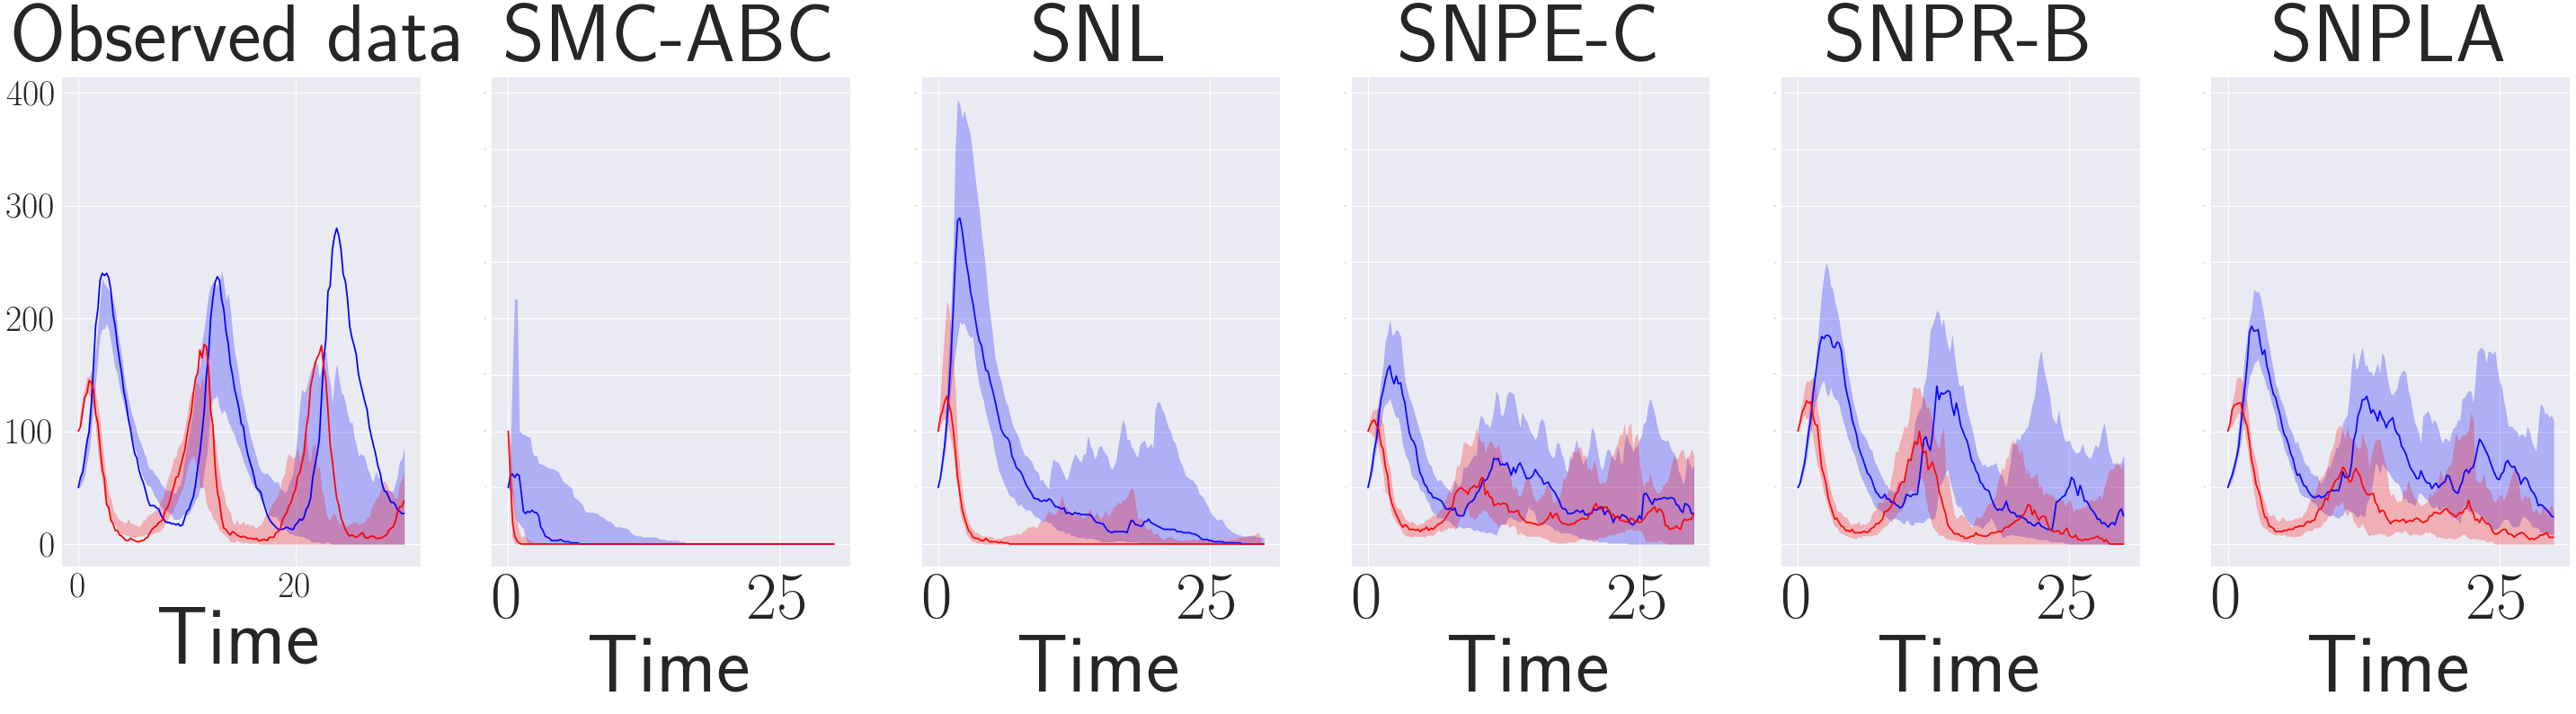

In [102]:
time_gird = np.arange(0,model.dur+model.dt, model.dt)

fig = plt.figure(figsize = (50,10))

ax1 = fig.add_subplot(1, 6, 1)
ax2 = fig.add_subplot(1, 6, 2) 
ax3 = fig.add_subplot(1, 6, 3)
ax4 = fig.add_subplot(1, 6, 4)
ax5 = fig.add_subplot(1, 6, 5)
ax6 = fig.add_subplot(1, 6, 6)

#ax1.plot(x_o[0,:], "b")
#ax1.plot(x_o[1,:], "r")

ax1.plot(time_gird, x_o[0,:], "b")
ax1.plot(time_gird, x_o[1,:], "r")
median_data_set = torch.median(torch.stack(x_sim_at_theta_true),dim=0)[0]

ax1.fill_between(time_gird, 
                np.quantile(torch.stack(x_sim_at_theta_true)[:,0,:], 0.25, axis = 0), 
                np.quantile(torch.stack(x_sim_at_theta_true)[:,0,:], 0.75, axis = 0), 
                alpha = 0.25, color = "b")

ax1.fill_between(time_gird, 
                np.quantile(torch.stack(x_sim_at_theta_true)[:,1,:], 0.25, axis = 0), 
                np.quantile(torch.stack(x_sim_at_theta_true)[:,1,:], 0.75, axis = 0), 
                alpha = 0.25, color = "r")


median_data_set = torch.median(torch.stack(paths_abssmc),dim=0)[0]
ax2.plot(time_gird, median_data_set[0,:], "b", alpha = 0.95)
ax2.plot(time_gird, median_data_set[1,:], "r", alpha = 0.95)


ax2.fill_between(time_gird, 
                np.quantile(torch.stack(paths_abssmc)[:,0,:], 0.25, axis = 0), 
                np.quantile(torch.stack(paths_abssmc)[:,0,:], 0.75, axis = 0), 
                alpha = 0.25, color = "b")


ax2.fill_between(time_gird, 
                np.quantile(torch.stack(paths_abssmc)[:,1,:], 0.25, axis = 0), 
                np.quantile(torch.stack(paths_abssmc)[:,1,:], 0.75, axis = 0), 
                alpha = 0.25, color = "r")


median_data_set = torch.median(torch.stack(paths_snl),dim=0)[0]
ax3.plot(time_gird, median_data_set[0,:], "b", alpha = 0.95)
ax3.plot(time_gird, median_data_set[1,:], "r", alpha = 0.95)

ax3.fill_between(time_gird, 
                np.quantile(torch.stack(paths_snl)[:,0,:], 0.25, axis = 0), 
                np.quantile(torch.stack(paths_snl)[:,0,:], 0.75, axis = 0), 
                alpha = 0.25, color = "b")


ax3.fill_between(time_gird, 
                np.quantile(torch.stack(paths_snl)[:,1,:], 0.25, axis = 0), 
                np.quantile(torch.stack(paths_snl)[:,1,:], 0.75, axis = 0), 
                alpha = 0.25, color = "r")

median_data_set = torch.median(torch.stack(paths_snpe_c),dim=0)[0]
ax4.plot(time_gird, median_data_set[0,:], "b", alpha = 0.95)
ax4.plot(time_gird, median_data_set[1,:], "r", alpha = 0.95)

ax4.fill_between(time_gird, 
                np.quantile(torch.stack(paths_snpe_c)[:,0,:], 0.25, axis = 0), 
                np.quantile(torch.stack(paths_snpe_c)[:,0,:], 0.75, axis = 0), 
                alpha = 0.25, color = "b")


ax4.fill_between(time_gird, 
                np.quantile(torch.stack(paths_snpe_c)[:,1,:], 0.25, axis = 0), 
                np.quantile(torch.stack(paths_snpe_c)[:,1,:], 0.75, axis = 0), 
                alpha = 0.25, color = "r")

median_data_set = torch.median(torch.stack(paths_b_post),dim=0)[0]
ax5.plot(time_gird, median_data_set[0,:], "b", alpha = 0.95)
ax5.plot(time_gird, median_data_set[1,:], "r", alpha = 0.95)

ax5.fill_between(time_gird, 
                np.quantile(torch.stack(paths_b_post)[:,0,:], 0.25, axis = 0), 
                np.quantile(torch.stack(paths_b_post)[:,0,:], 0.75, axis = 0), 
                alpha = 0.25, color = "b")


ax5.fill_between(time_gird, 
                np.quantile(torch.stack(paths_b_post)[:,1,:], 0.25, axis = 0), 
                np.quantile(torch.stack(paths_b_post)[:,1,:], 0.75, axis = 0), 
                alpha = 0.25, color = "r")

median_data_set = torch.median(torch.stack(paths_spa_flow),dim=0)[0]
ax6.plot(time_gird, median_data_set[0,:], "b", alpha = 0.95)
ax6.plot(time_gird, median_data_set[1,:], "r", alpha = 0.95)

ax6.fill_between(time_gird, 
                np.quantile(torch.stack(paths_spa_flow)[:,0,:], 0.25, axis = 0), 
                np.quantile(torch.stack(paths_spa_flow)[:,0,:], 0.75, axis = 0), 
                alpha = 0.25, color = "b")


ax6.fill_between(time_gird, 
                np.quantile(torch.stack(paths_spa_flow)[:,1,:], 0.25, axis = 0), 
                np.quantile(torch.stack(paths_spa_flow)[:,1,:], 0.75, axis = 0), 
                alpha = 0.25, color = "r")
   

ax1.set_title("Observed data",fontsize=90)
ax2.set_title("SMC-ABC",fontsize=90)
ax3.set_title("SNL",fontsize=90)
ax4.set_title("SNPE-C",fontsize=90)
ax5.set_title("SNPR-B",fontsize=90)
ax6.set_title("SNPLA",fontsize=90)

ax1.tick_params(axis='both', which='major', labelsize=40)
ax1.tick_params(axis='both', which='minor', labelsize=20)

ax2.tick_params(axis='both', which='major', labelsize=75)
ax2.tick_params(axis='both', which='minor', labelsize=75)

ax3.tick_params(axis='both', which='major', labelsize=75)
ax3.tick_params(axis='both', which='minor', labelsize=75)

ax4.tick_params(axis='both', which='major', labelsize=75)
ax4.tick_params(axis='both', which='minor', labelsize=75)

ax5.tick_params(axis='both', which='major', labelsize=75)
ax5.tick_params(axis='both', which='minor', labelsize=75)

ax6.tick_params(axis='both', which='major', labelsize=75)
ax6.tick_params(axis='both', which='minor', labelsize=75)

for ax in [ax1, ax2, ax4, ax5, ax6]:
    
    ax.set_ylim(ax3.get_ylim())
    ax.set_xlabel("Time", fontsize=90)

ax3.set_xlabel("Time", fontsize=90)

for ax in [ax2, ax3, ax4, ax5, ax6]:
    
    ax.tick_params(axis='y', which='major', labelsize=0)
    ax.tick_params(axis='y', which='minor', labelsize=0)
    
plt.savefig("./fig/posterior_pred_median_and_quantile_data_set_" + str(data_set) + "_n.pdf", bbox_inches='tight')

In [100]:
torch.stack(x_sim_at_theta_true)

tensor([[[ 50.,  55.,  56.,  ..., 160., 141., 140.],
         [100., 128., 144.,  ...,  24.,  21.,  18.]],

        [[ 50.,  50.,  56.,  ...,   0.,   0.,   0.],
         [100., 110., 121.,  ...,   0.,   0.,   0.]],

        [[ 50.,  61.,  60.,  ...,  42.,  42.,  42.],
         [100., 119., 130.,  ...,  53.,  57.,  65.]],

        ...,

        [[ 50.,  57.,  66.,  ..., 144., 151., 157.],
         [100.,  97., 115.,  ...,  69.,  58.,  63.]],

        [[ 50.,  49.,  57.,  ...,  41.,  38.,  34.],
         [100., 106., 113.,  ...,  19.,  23.,  31.]],

        [[ 50.,  56.,  58.,  ...,  15.,  15.,  15.],
         [100., 112., 121.,  ...,   0.,   0.,   0.]]])

In [101]:
median_data_set = torch.median(torch.stack(x_sim_at_theta_true),dim=0)[0]


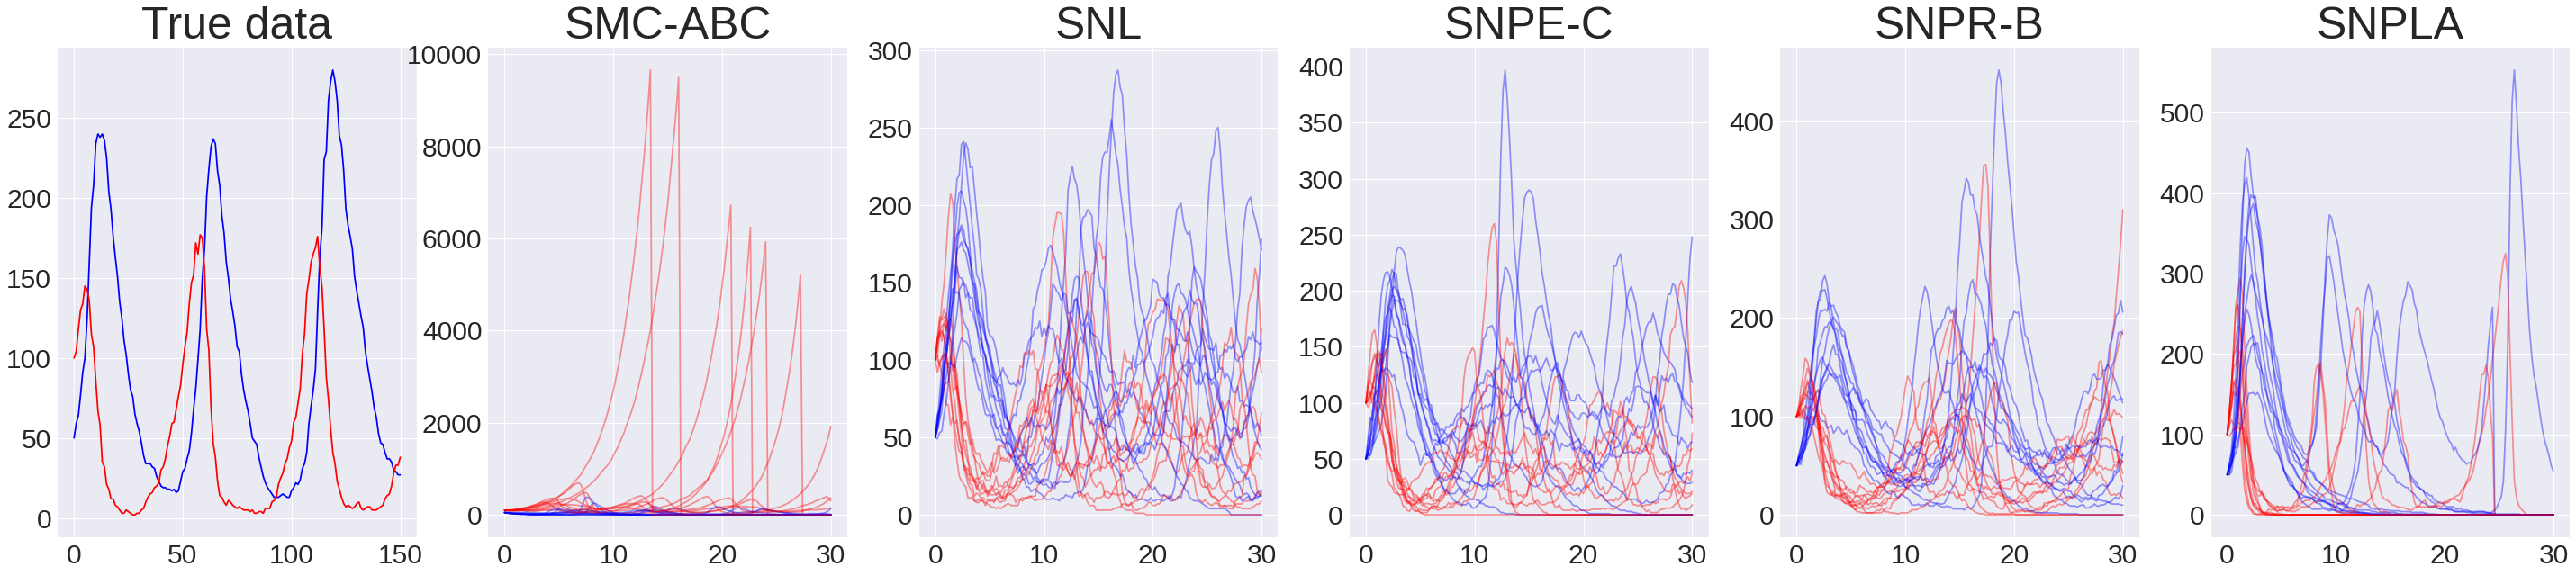

In [66]:
time_gird = np.arange(0,model.dur+model.dt, model.dt)

fig = plt.figure(figsize = (50,10))

ax1 = fig.add_subplot(1, 6, 1)
ax2 = fig.add_subplot(1, 6, 2) 
ax3 = fig.add_subplot(1, 6, 3)
ax4 = fig.add_subplot(1, 6, 4)
ax5 = fig.add_subplot(1, 6, 5)
ax6 = fig.add_subplot(1, 6, 6)

ax1.plot(x_o[0,:], "b")
ax1.plot(x_o[1,:], "r")

for p in paths_abssmc:
    ax2.plot(time_gird, p[0,:], "b", alpha = 0.4)
    ax2.plot(time_gird, p[1,:], "r", alpha = 0.4)

for p in paths_snl:
    ax3.plot(time_gird, p[0,:], "b", alpha = 0.4)
    ax3.plot(time_gird, p[1,:], "r", alpha = 0.4)

for p in paths_snpe_c:
    ax4.plot(time_gird, p[0,:], "b", alpha = 0.4)
    ax4.plot(time_gird, p[1,:], "r", alpha = 0.4)

for p in paths_b_post:
    ax5.plot(time_gird, p[0,:], "b", alpha = 0.4)
    ax5.plot(time_gird, p[1,:], "r", alpha = 0.4)


for p in paths_spa_flow:
    ax6.plot(time_gird, p[0,:], "b", alpha = 0.4)
    ax6.plot(time_gird, p[1,:], "r", alpha = 0.4)
   

ax1.set_title("True data",fontsize=50)
ax2.set_title("SMC-ABC",fontsize=50)
ax3.set_title("SNL",fontsize=50)
ax4.set_title("SNPE-C",fontsize=50)
ax5.set_title("SNPR-B",fontsize=50)
ax6.set_title("SNPLA",fontsize=50)

ax1.tick_params(axis='both', which='major', labelsize=30)
ax1.tick_params(axis='both', which='minor', labelsize=25)

ax2.tick_params(axis='both', which='major', labelsize=30)
ax2.tick_params(axis='both', which='minor', labelsize=25)

ax3.tick_params(axis='both', which='major', labelsize=30)
ax3.tick_params(axis='both', which='minor', labelsize=25)

ax4.tick_params(axis='both', which='major', labelsize=30)
ax4.tick_params(axis='both', which='minor', labelsize=25)

ax5.tick_params(axis='both', which='major', labelsize=30)
ax5.tick_params(axis='both', which='minor', labelsize=25)

ax6.tick_params(axis='both', which='major', labelsize=30)
ax6.tick_params(axis='both', which='minor', labelsize=25)

plt.savefig("./fig/posterior_pred_samples_" + str(data_set) + ".pdf")


In [99]:
post_samples_errors_abssmc = []
post_samples_errors_snl = []
post_samples_errors_snpe_c = []
post_samples_errors_b_post = []
post_samples_errors_spa_flow = []

In [101]:
for i in range(seed_max):
    data_set = i 
    print("---------------")
    print(i)
    idx = random.sample(range(1000), 10)
    
    post_samples_abssmc = easyabc_post[idx,:]
    paths_abssmc = model.model_sim_paths(torch.from_numpy(post_samples_abssmc))

    post_samples_snl = snl_post[iter-1][data_set][idx,:]
    paths_snl = model.model_sim_paths(torch.from_numpy(post_samples_snl))

    post_samples_snpe_c = snpe_c_post[iter-1][data_set][idx,:]
    paths_snpe_c = model.model_sim_paths(torch.from_numpy(post_samples_snpe_c))

    post_samples_b_post = snre_b_post[iter-1][data_set][idx,:]
    paths_b_post = model.model_sim_paths(torch.from_numpy(post_samples_b_post))

    post_samples_spa_flow = spa_flow_post[iter-1][data_set][idx,:]
    paths_spa_flow = model.model_sim_paths(torch.from_numpy(post_samples_spa_flow))
    
    s_abssmc = func.normalize_summary_stats(LotkaVolterra.calc_summary_stats(paths_abssmc),m_s_of_prior, s_s_of_prior)
    s_snl = func.normalize_summary_stats(LotkaVolterra.calc_summary_stats(paths_snl),m_s_of_prior, s_s_of_prior)
    s_snpe_c = func.normalize_summary_stats(LotkaVolterra.calc_summary_stats(paths_snpe_c),m_s_of_prior, s_s_of_prior)
    s_b_post = func.normalize_summary_stats(LotkaVolterra.calc_summary_stats(paths_b_post),m_s_of_prior, s_s_of_prior)
    s_spa_flow = func.normalize_summary_stats(LotkaVolterra.calc_summary_stats(paths_spa_flow),m_s_of_prior, s_s_of_prior)
    
    
    post_samples_errors_abssmc.append((s_abssmc - s_x_o).abs().mean().item())
    post_samples_errors_snl.append((s_snl - s_x_o).abs().mean().item()) 
    post_samples_errors_snpe_c.append((s_snpe_c - s_x_o).abs().mean().item()) 
    post_samples_errors_b_post.append((s_b_post - s_x_o).abs().mean().item()) 
    post_samples_errors_spa_flow.append((s_spa_flow - s_x_o).abs().mean().item()) 
    

---------------
0
Simulation too long!
Simulation too long!
Simulation too long!
---------------
1
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
---------------
2
Simulation too long!
Simulation too long!
---------------
3
Simulation too long!
Simulation too long!
Simulation too long!
---------------
4
Simulation too long!
Simulation too long!
Simulation too long!
---------------
5
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
---------------
6
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
---------------
7
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
---------------
8
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
---------------
9
Simulation too long!
Simulation too long!


In [111]:
post_samples_errors_abssmc = np.array(post_samples_errors_abssmc)
post_samples_errors_snl = np.array(post_samples_errors_snl) 
post_samples_errors_snpe_c = np.array(post_samples_errors_snpe_c) 
post_samples_errors_b_post = np.array(post_samples_errors_b_post) 
post_samples_errors_spa_flow = np.array(post_samples_errors_spa_flow) 



In [129]:

print("Posterior pred. mean absolute error of summary stats.")

m_temp = round(np.median(post_samples_errors_abssmc),3)
q_temp = np.quantile(post_samples_errors_abssmc, (0.25, 0.75))

print("SMC-ABC: " + str(m_temp) + ", [" + str(round(q_temp[0],3)) + ", " + str(round(q_temp[1],3))+ "]")

m_temp = round(np.median(post_samples_errors_snl),3)
q_temp = np.quantile(post_samples_errors_snl, (0.25, 0.75))

print("SNL: " + str(m_temp) + ", [" + str(round(q_temp[0],3)) + ", " + str(round(q_temp[1],3))+ "]")

m_temp = round(np.median(post_samples_errors_snpe_c),3)
q_temp = np.quantile(post_samples_errors_snpe_c, (0.25, 0.75))

print("SNPE-C: " + str(m_temp) + ", [" + str(round(q_temp[0],3)) + ", " + str(round(q_temp[1],3))+ "]")

m_temp = round(np.median(post_samples_errors_b_post),3)
q_temp = np.quantile(post_samples_errors_b_post, (0.25, 0.75))

print("SNPR-B: " + str(m_temp) + ", [" + str(round(q_temp[0],3)) + ", " + str(round(q_temp[1],3))+ "]")

m_temp = round(np.median(post_samples_errors_spa_flow),3)
q_temp = np.quantile(post_samples_errors_spa_flow, (0.25, 0.75))

print("SNPLA: " + str(m_temp) + ", [" + str(round(q_temp[0],3)) + ", " + str(round(q_temp[1],3))+ "]")

Posterior pred. mean absolute error of summary stats.
SMC-ABC: 2.157, [1.766, 2.312]
SNL: 0.338, [0.287, 0.493]
SNPE-C: 0.286, [0.267, 0.312]
SNPR-B: 0.31, [0.258, 0.637]
SNPLA: 0.305, [0.285, 0.424]


In [182]:
post_samples_errors_b_post

array([0.6777941 , 0.26532954, 0.30036893, 0.24991643, 0.3103295 ,
       0.98904514, 1.02295911, 0.19385417, 0.59622437, 0.51184678,
       0.192057  ])

In [ ]:
data_set =  random.randint(0, 9)

fig = plt.figure(figsize = (50,10))

ax1 = fig.add_subplot(1, 6, 1)
ax2 = fig.add_subplot(1, 6, 2, sharex=ax1) # why arent the axis fixed
ax3 = fig.add_subplot(1, 6, 3, sharex=ax1)
ax4 = fig.add_subplot(1, 6, 4, sharex=ax1)
ax5 = fig.add_subplot(1, 6, 5, sharex=ax1)
ax6 = fig.add_subplot(1, 6, 6, sharex=ax1)

ax1.scatter(analytical_post[data_set][:,0],analytical_post[data_set][:,1],alpha = 0.5,color = "g")

ax2.scatter(smcabc_post[data_set][:,0],smcabc_post[data_set][:,1],alpha = 0.5)
ax2.set_xlim(ax1.get_xlim())
ax2.set_ylim(ax1.get_ylim())

ax3.scatter(snl_post[data_set][:,0],snl_post[data_set][:,1],alpha = 0.5)
ax3.set_xlim(ax1.get_xlim())
ax3.set_ylim(ax1.get_ylim())

ax4.scatter(snpe_c_post[data_set][:,0],snpe_c_post[data_set][:,1],alpha = 0.5)
ax4.set_xlim(ax1.get_xlim())
ax4.set_ylim(ax1.get_ylim())

ax5.scatter(snpr_b_post[data_set][:,0],snpr_b_post[data_set][:,1],alpha = 0.5)
ax5.set_xlim(ax1.get_xlim())
ax5.set_ylim(ax1.get_ylim())

ax6.scatter(spa_flow_post[data_set][:,0],spa_flow_post[data_set][:,1],alpha = 0.5)
ax6.set_xlim(ax1.get_xlim())
ax6.set_ylim(ax1.get_ylim())

ax1.set_title("Analytical",fontsize=50)
ax2.set_title("SMC-ABC",fontsize=50)
ax3.set_title("SNL",fontsize=50)
ax4.set_title("SNPE-C",fontsize=50)
ax5.set_title("SNPR-B",fontsize=50)
ax6.set_title("SPA-Flow",fontsize=50)
#plt.savefig('2d w 5 obs/true_post_training_from_target_joint_approx_posteriors_plot_1.png')


ax1.set_ylabel(r'$\theta_1$',fontsize=50)

ax1.set_xlabel(r'$\theta_2$',fontsize=50)
ax2.set_xlabel(r'$\theta_2$',fontsize=50)
ax3.set_xlabel(r'$\theta_2$',fontsize=50)
ax4.set_xlabel(r'$\theta_2$',fontsize=50)
ax5.set_xlabel(r'$\theta_2$',fontsize=50)
ax6.set_xlabel(r'$\theta_2$',fontsize=50)

ax1.tick_params(axis='both', which='major', labelsize=30)
ax1.tick_params(axis='both', which='minor', labelsize=25)

ax2.tick_params(axis='both', which='major', labelsize=30)
ax2.tick_params(axis='both', which='minor', labelsize=25)

ax3.tick_params(axis='both', which='major', labelsize=30)
ax3.tick_params(axis='both', which='minor', labelsize=25)

ax4.tick_params(axis='both', which='major', labelsize=30)
ax4.tick_params(axis='both', which='minor', labelsize=25)

ax5.tick_params(axis='both', which='major', labelsize=30)
ax5.tick_params(axis='both', which='minor', labelsize=25)

ax6.tick_params(axis='both', which='major', labelsize=30)
ax6.tick_params(axis='both', which='minor', labelsize=25)

print("Res posterior for dataset: " + str(data_set))

file_name_base = "./low_dim_w_five_obs/fig/mv_gauss_5_obs_posterior_samples"
file_name_iter_data = "_" + str(iter) + "_" + str(data_set)
plt.savefig(file_name_base + file_name_iter_data + ".pdf")

Likelihood model at gt parameters 

In [37]:
import torch

In [94]:
spa_flow_lik = []

for i in range(seed_max):
    id_job = str(i+1) + '_' + str(seed_data)
    p = 'data/data_recon_spa_flow_' + id_job + '.csv'
    spa_flow_lik.append(read_posterior_samples(p))
    #spa_flow_lik.append(func.normalize_summary_stats(torch.from_numpy(read_posterior_samples(p)),m_s_of_prior, s_s_of_prior).numpy())

In [95]:
# here we should load the data for the spa_lik model 
snl_lik = []

for i in range(seed_max):
    if i != 7:
        id_job = str(i+1) + '_' + str(seed_data)
        p = 'data/data_recon_snl_' + id_job + '.csv'
        snl_lik.append(read_posterior_samples(p))
        #snl_lik.append(func.normalize_summary_stats(torch.from_numpy(read_posterior_samples(p)),m_s_of_prior, s_s_of_prior).numpy())

In [147]:
true_model = []

for i in range(seed_max):
    id_job = str(i+1) + '_' + str(seed_data)
    p = 'data/data_recon_model_' + id_job + '.csv'
    true_model.append(read_posterior_samples(p))

In [135]:
true_model.shape

AttributeError: 'list' object has no attribute 'shape'

In [150]:
data_sets_max = 6

spa_snl_true_medians = np.zeros((9, data_set_max, 3))

for i in range(data_set_max):
    spa_snl_true_medians[:,i,0] = np.median(spa_flow_lik[i], axis = 0)
    spa_snl_true_medians[:,i,1] = np.median(snl_lik[i], axis = 0)
    spa_snl_true_medians[:,i,2] = np.median(true_model[i], axis = 0)


In [183]:
avg_rmse_snl = (abs(spa_snl_true_medians[:,:,2] - spa_snl_true_medians[:,:,1])).mean(axis = 0)
print(avg_rmse_snl)

[0.11303347 0.09139603 0.1058559  0.08796912 0.1660942  0.24199654]


In [190]:
avg_rmse_spa = (abs(spa_snl_true_medians[:,:,2] - spa_snl_true_medians[:,:,0])).mean(axis = 0)
print(avg_rmse_spa)
print(np.median(avg_rmse_spa))

[0.11107867 0.09486814 0.24189299 0.89563502 0.47941017 0.54100643]
0.36065158025465077


In [191]:
avg_rmse_snl = (abs(spa_snl_true_medians[:,:,2] - spa_snl_true_medians[:,:,1])).mean(axis = 0).mean()
avg_rmse_spa = (abs(spa_snl_true_medians[:,:,2] - spa_snl_true_medians[:,:,0])).mean(axis = 0).mean()



In [195]:
print("(True) Mean of medians: "+ str(spa_snl_true_medians[:,:,2].mean(axis=1).round(3)))
print("(True) Std of medians: "+ str(spa_snl_true_medians[:,:,2].mean(axis=1).round(3)))
print("(SNPLA) Avg. RMSE of medians: " + str(avg_rmse_spa.round(3)))
print("(SNPLA) Mean of medians " + str(spa_snl_true_medians[:,:,0].mean(axis=1).round(3)))
print("(SNPLA) Std of medians " + str(spa_snl_true_medians[:,:,0].std(axis=1).round(3)))
print("(SNL) Avg. RMSE of medians: " + str(avg_rmse_snl.round(3)))
print("(SNL) Mean of medians " + str(spa_snl_true_medians[:,:,1].mean(axis=1).round(3)))
print("(SNL) Std of medians " + str(spa_snl_true_medians[:,:,1].std(axis=1).round(3)))

(True) Mean of medians: [-0.18   0.448  2.1    2.1   -0.149 -0.147  2.989  4.028  0.24 ]
(True) Std of medians: [-0.18   0.448  2.1    2.1   -0.149 -0.147  2.989  4.028  0.24 ]
(SNPLA) Avg. RMSE of medians: 0.394
(SNPLA) Mean of medians [-0.234  0.288  1.371  1.351 -0.146 -0.154  2.894  3.416  0.904]
(SNPLA) Std of medians [0.064 0.55  0.422 0.462 0.064 0.025 0.077 0.592 1.151]
(SNL) Avg. RMSE of medians: 0.134
(SNL) Mean of medians [-0.254  0.158  2.149  2.156 -0.149 -0.147  2.911  3.795  0.308]
(SNL) Std of medians [0.006 0.069 0.319 0.322 0.    0.    0.028 0.102 0.008]


In [178]:
data_set = 2

In [179]:
print("(True) Q1: " + str(np.quantile(true_model[data_set], 0.25, axis = 0)))
print("(True) Median: " + str(np.median(true_model[data_set], axis = 0)))
print("(True) Q2: " + str(np.quantile(true_model[data_set], 0.75, axis = 0)))

(True) Q1: [-0.21796974  0.26056058  1.76702693  1.76702693 -0.149138   -0.14676366
  2.96678758  3.96470988  0.22789452]
(True) Median: [-0.18068444  0.4427119   2.09312832  2.09312832 -0.14910897 -0.14673474
  2.98840022  4.02722597  0.2409306 ]
(True) Q2: [-0.17265222  0.49342675  2.32794887  2.32794887 -0.1490672  -0.14669089
  2.99945343  4.07075775  0.27864678]


In [180]:
print("(SNPLA) Q1: " + str(np.quantile(spa_flow_lik[data_set], 0.25, axis = 0)))
print("(SNPLA) Median: " + str(np.median(spa_flow_lik[data_set], axis = 0)))
print("(SNPLA) Q2: " + str(np.quantile(spa_flow_lik[data_set], 0.75, axis = 0)))

(SNPLA) Q1: [-0.29836624 -0.04730669  1.21476513  1.23113039 -0.15222993 -0.14785606
  2.83031958  3.97769487  0.38357434]
(SNPLA) Median: [-0.29267117 -0.01789982  1.49406439  1.51168323 -0.15182628 -0.14738476
  2.87767923  4.16371012  0.4142876 ]
(SNPLA) Q2: [-0.28674877  0.03937354  1.92809224  1.93153664 -0.15139343 -0.14697673
  2.9110201   4.32273519  0.44383509]


In [181]:
print("(SNL) Q1: " + str(np.quantile(snl_lik[data_set], 0.25, axis = 0)))
print("(SNL) Median: " + str(np.median(snl_lik[data_set], axis = 0)))
print("(SNL) Q2: " + str(np.quantile(snl_lik[data_set], 0.75, axis = 0)))

(SNL) Q1: [-0.28071757  0.01195507  1.55935904  1.5693768  -0.14884642 -0.14665243
  2.83249635  3.48966897  0.27338678]
(SNL) Median: [-0.25234269  0.100911    2.05983055  2.06537652 -0.14847786 -0.14622803
  2.89734697  3.71439028  0.31409818]
(SNL) Q2: [-0.21434831  0.36783099  2.9029544   2.93311179 -0.14811528 -0.14582707
  2.94272387  3.90607953  0.35987884]


Posterior samples

In [48]:
spa_flow_lik = []

for i in range(seed_max):
    id_job = str(i+1) + '_' + str(seed_data)
    p = 'data/data_recon_post_spa_flow_' + id_job + '.csv'
    spa_flow_lik.append(read_posterior_samples(p))
    #spa_flow_lik.append(func.normalize_summary_stats(torch.from_numpy(read_posterior_samples(p)),m_s_of_prior, s_s_of_prior).numpy())

In [49]:
# here we should load the data for the spa_lik model 
snl_lik = []

for i in range(seed_max):
    id_job = str(i+1) + '_' + str(seed_data)
    p = 'data/data_recon_post_snl_' + id_job + '.csv'
    snl_lik.append(read_posterior_samples(p))
    #snl_lik.append(func.normalize_summary_stats(torch.from_numpy(read_posterior_samples(p)),m_s_of_prior, s_s_of_prior).numpy())

In [40]:
true_model = []

for i in range(seed_max):
    id_job = str(i+1) + '_' + str(seed_data)
    p = 'data/data_recon_model_' + id_job + '.csv'
    true_model.append(read_posterior_samples(p))

In [76]:
spa_flow_lik = np.array(spa_flow_lik)
snl_lik = np.array(snl_lik)
true_model = np.array(true_model)

In [77]:
snl_lik.shape

(10, 1000, 9)

In [ ]:
snl_lik

In [58]:
import ot 

def calc_emd(ref_data_set, data_set, p = 2):
    
    # from https://pythonot.github.io/quickstart.html#optimal-transport-and-wasserstein-distance
    
    n = ref_data_set.shape[0]
    a, b = np.ones((n,)) / n, np.ones((n,)) / n
    
    if p == 2:
        
        M = ot.dist(ref_data_set, data_set)
    
        return np.sqrt(ot.emd2(a, b, M))
    
    elif p == 1:
        
        M = ot.dist(ref_data_set, data_set, metric='euclidean')
    
        return ot.emd2(a, b, M)

In [60]:
snl_post_pred_emd = np.zeros((seed_max))

for j in range(seed_max):
    snl_post_pred_emd[j] = calc_emd(true_model[i], snl_lik[i])     

In [62]:
spa_flow_post_pred_emd = np.zeros((seed_max))

for i in range(nbr_rounds):
    spa_flow_post_pred_emd[i] = calc_emd(true_model[i], spa_flow_lik[i])         

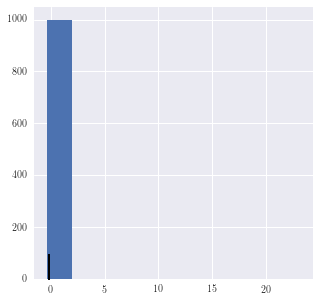

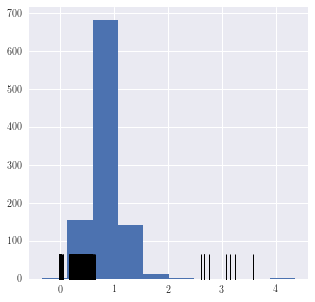

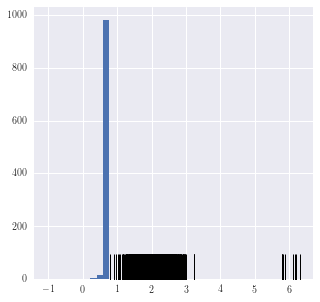

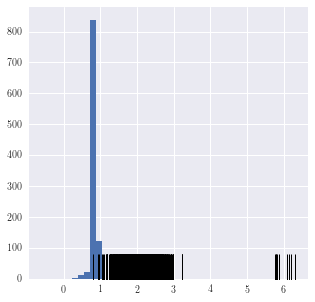

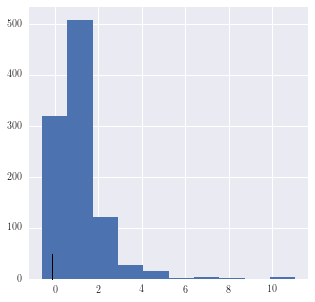

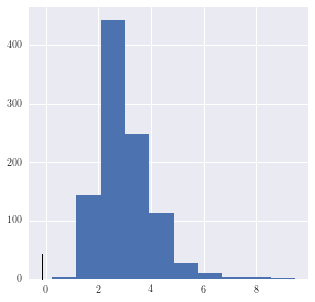

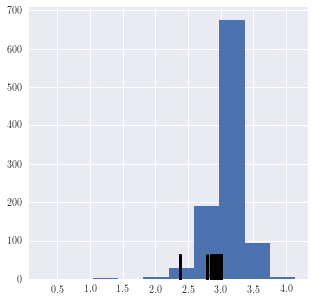

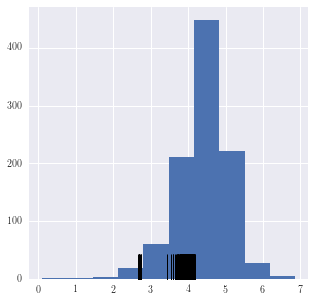

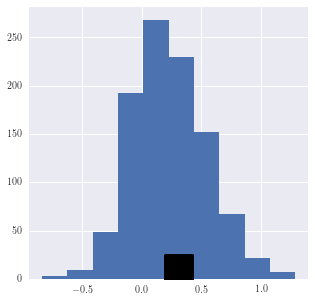

In [88]:

for i in range(9):
    fig = plt.figure(figsize = (5,5))
    ax1 = fig.add_subplot(1, 1, 1)
    ax1.hist(snl_lik[1,:,i])
    ax1.plot(true_model[1,:,i], [0.01]*len(snl_lik[1,:,i]), '|', color='k', markersize = 50) # should be snl_lik


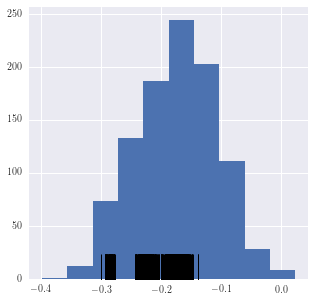

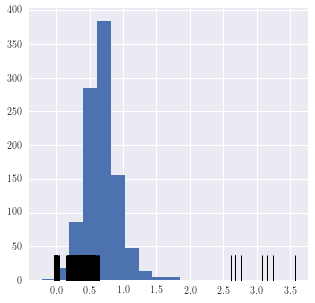

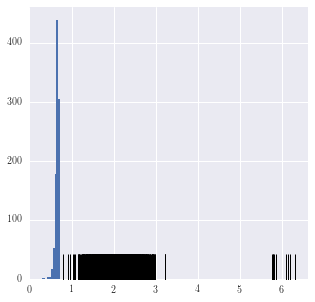

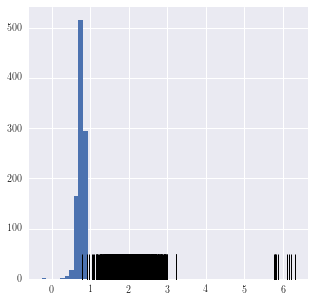

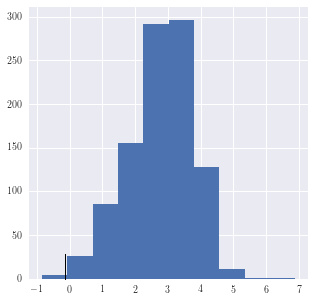

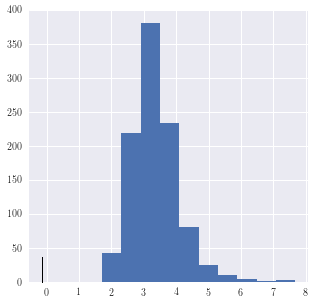

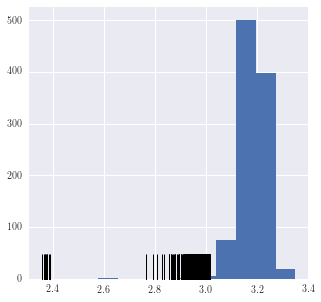

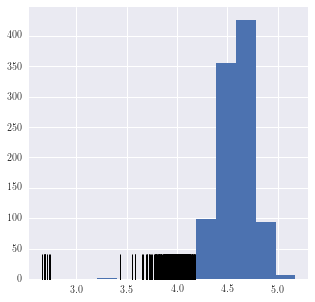

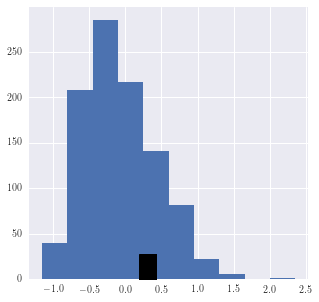

In [89]:
for i in range(9):
    fig = plt.figure(figsize = (5,5))
    ax1 = fig.add_subplot(1, 1, 1)
    ax1.hist(spa_flow_lik[1,:,i])
    ax1.plot(true_model[1,:,i], [0.01]*len(spa_flow_lik[1,:,i]), '|', color='k', markersize = 50) # should be snl_lik



In [82]:
snl_lik[:,:,0].reshape()

(10, 1000)

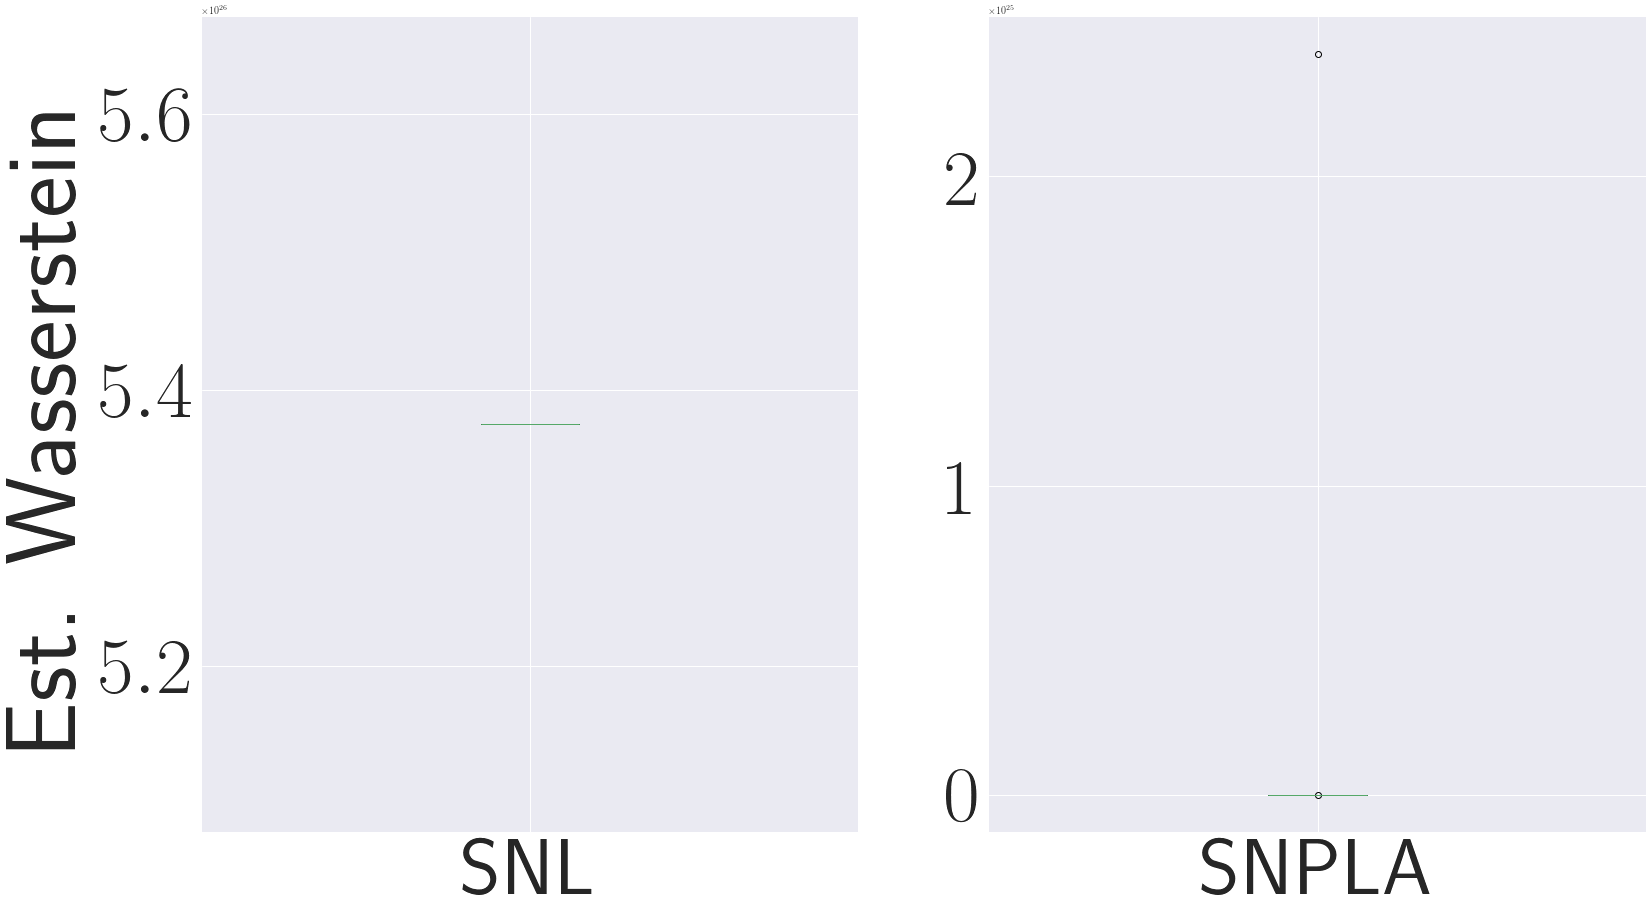

In [65]:
r = 5 # round 

fig = plt.figure(figsize = (40,15))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)

ax1.boxplot(snl_post_pred_emd[:], labels = ["SNL"])
ax2.boxplot(spa_flow_post_pred_emd[:], labels = ["SNPLA"])

#ax1.set_title("SNL",fontsize=60)
#ax2.set_title("SNPLA",fontsize=60)

#ax1.set_ylim([0.08,0.175])
#ax2.set_ylim([0.08,0.175])

ax1.tick_params(axis='both', which='major', labelsize=80)
ax1.tick_params(axis='both', which='minor', labelsize=70)

ax2.tick_params(axis='both', which='major', labelsize=80)
ax2.tick_params(axis='both', which='minor', labelsize=70)

ax1.set_ylabel("Est. Wasserstein", fontsize=100)


plt.savefig("./fig/post_pred_emd_.pdf",bbox_inches='tight')



In [63]:
data_set

1

NameError: name 'x_o_summary_stats_samples_true' is not defined

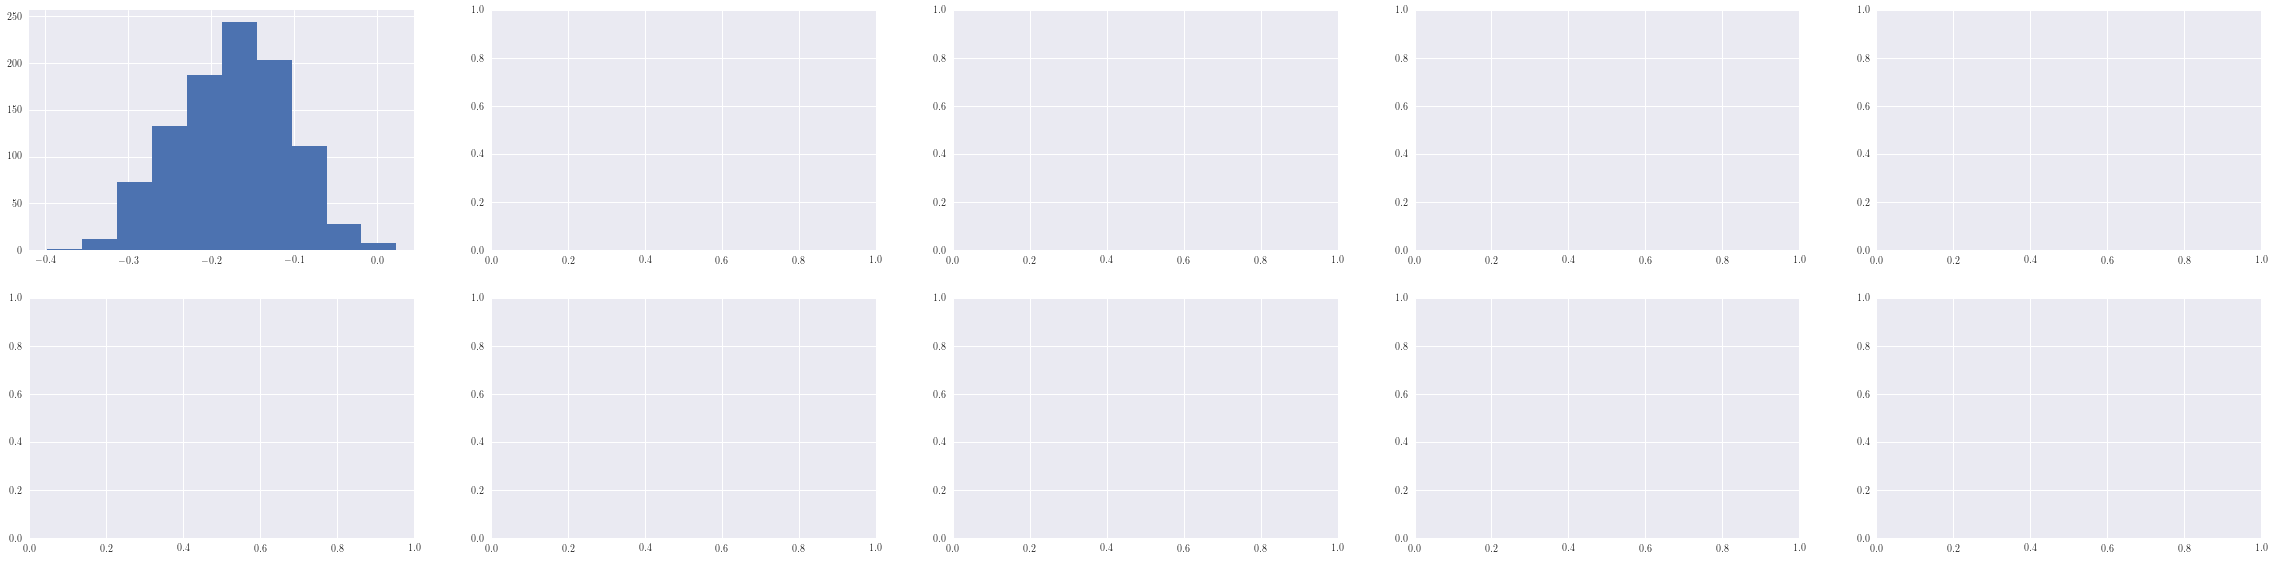

In [42]:

fig = plt.figure(figsize = (40,15))


ax1 = fig.add_subplot(3, 5, 1)
ax2 = fig.add_subplot(3, 5, 2)
ax3 = fig.add_subplot(3, 5, 3)
ax4 = fig.add_subplot(3, 5, 4)
ax5 = fig.add_subplot(3, 5, 5)

ax6 = fig.add_subplot(3, 5, 6)
ax7 = fig.add_subplot(3, 5, 7)
ax8 = fig.add_subplot(3, 5, 8)
ax9 = fig.add_subplot(3, 5, 9)
ax10 = fig.add_subplot(3, 5, 10)


ax1.hist(spa_flow_lik[data_set][:,0])#
ax1.plot(x_o_summary_stats_samples_true[data_set][:,0], [0.01]*len(spa_flow_lik[data_set][:,0]), '|', color='k', markersize = 50)
ax1.plot(x_o_summary_stats_true[data_set][0],9,"X", markersize = 15)

#ax2.hist(spa_flow_lik[data_set][:,1])
#ax2.plot(x_o_summary_stats_samples_true[data_set][:,1], [0.01]*len(spa_flow_lik[data_set][:,0]), '|', color='k', markersize = 50)
#ax2.plot(x_o_summary_stats_true[data_set][1],9,"X", markersize = 15)

#ax3.hist(spa_flow_lik[data_set][:,2])
#ax3.plot(x_o_summary_stats_samples_true[data_set][:,2], [0.01]*len(spa_flow_lik[data_set][:,0]), '|', color='k', markersize = 50)
#ax3.plot(x_o_summary_stats_true[data_set][2],9,"X", markersize = 15)

#ax4.hist(spa_flow_lik[data_set][:,3])
#ax4.plot(x_o_summary_stats_samples_true[data_set][:,3], [0.01]*len(spa_flow_lik[data_set][:,0]), '|', color='k', markersize = 50)
#ax4.plot(x_o_summary_stats_true[data_set][3],9,"X", markersize = 15)

#ax5.hist(spa_flow_lik[data_set][:,4])
#ax5.plot(x_o_summary_stats_samples_true[data_set][:,4], [0.01]*len(spa_flow_lik[data_set][:,0]), '|', color='k', markersize = 50)
#ax5.plot(x_o_summary_stats_true[data_set][4],9,"X", markersize = 15)

#ax6.hist(snl_lik[data_set][:,0])
#ax6.plot(x_o_summary_stats_samples_true[data_set][:,0], [0.01]*len(snl_lik[data_set][:,0]), '|', color='k', markersize = 50) # should be snl_lik
#ax6.plot(x_o_summary_stats_true[data_set][0],9,"X", markersize = 15)

#ax7.hist(snl_lik[data_set][:,1])
#ax7.plot(x_o_summary_stats_samples_true[data_set][:,1], [0.01]*len(snl_lik[data_set][:,0]), '|', color='k', markersize = 50)
#ax7.plot(x_o_summary_stats_true[data_set][1],9,"X", markersize = 15)

#ax8.hist(snl_lik[data_set][:,2])
#ax8.plot(x_o_summary_stats_samples_true[data_set][:,2], [0.01]*len(snl_lik[data_set][:,0]), '|', color='k', markersize = 50)
#ax8.plot(x_o_summary_stats_true[data_set][2],9,"X", markersize = 15)

#ax9.hist(snl_lik[data_set][:,3])
#ax9.plot(x_o_summary_stats_samples_true[data_set][:,3], [0.01]*len(snl_lik[data_set][:,0]), '|', color='k', markersize = 50)
#ax9.plot(x_o_summary_stats_true[data_set][3],9,"X", markersize = 15)

#ax10.hist(snl_lik[data_set][:,4])
#ax10.plot(x_o_summary_stats_samples_true[data_set][:,4], [0.01]*len(snl_lik[data_set][:,0]), '|', color='k', markersize = 50) #linewidths=1)
#ax10.plot(x_o_summary_stats_true[data_set][4],9,"X", markersize = 15)

#ax1.set_title(r'$S_1$',fontsize=20)
#ax2.set_title(r'$S_2$',fontsize=20)
#ax3.set_title(r'$S_3$',fontsize=20)
#ax4.set_title(r'$S_4$',fontsize=20)
#ax5.set_title(r'$S_5$',fontsize=20)
#ax1.set_ylabel("SPA-Flow",fontsize=25)
#ax6.set_ylabel("SNL",fontsize=25)

In [46]:
# here I could use wasserstein, but not really needed 

abs_error_per_data_set_flow = [] 
abs_error_per_data_set_spa = [] 

# I am not sure if this makes a lot of sense since the inference is cond on S(x_o) not  the sampled data sets!
for i in range(len(seed)):
    abs_error_per_data_set_flow.append(abs(x_o_summary_stats_true[i] - spa_flow_lik[i]).mean()) # this is correct since we now have the case where calc the error for the summary stats that we cond on
    abs_error_per_data_set_spa.append(abs(x_o_summary_stats_true[i] - snl_lik[i]).mean()) # should be snl_lik
    
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize = (40,15))


ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.hist(abs_error_per_data_set_flow,5)
ax1.set_title("Flow",fontsize=20)
ax1.set_xlabel("Avg. abs. error",fontsize=20)

ax2.hist(abs_error_per_data_set_spa,5)
ax2.set_title("SPA",fontsize=20)
ax2.set_xlabel("Avg. abs. error",fontsize=20)

print("Mean abs error (Flow): "  + str(np.array(abs_error_per_data_set_flow).mean().round(4)))
print("Mean abs error (SPA): "  + str(np.array(abs_error_per_data_set_spa).mean().round(4)))

NameError: name 'x_o_summary_stats_true' is not defined

In [42]:
x_o_summary_stats_true[1].shape

(5,)

Check like models for $\theta_{prior}$

In [44]:
spa_flow_lik_prior = []

for s in seed:
    p = 'low_dim_w_summary_stats/data/data_recon_prior_spa_flow_' + str(dim) + '_' + str(s) + '_' + str(seed_data) + '.csv'
    spa_flow_lik_prior.append(read_posterior_samples(p))

In [53]:
snl_lik_prior = []

for s in seed:
    p = 'low_dim_w_summary_stats/data/data_recon_prior_snl_' + str(dim) + '_' + str(s) + '_' + str(seed_data) + '.csv'
    snl_lik_prior.append(read_posterior_samples(p))

In [50]:
model_prior = []

for s in seed:
    p = 'low_dim_w_summary_stats/data/x_summary_stats_samples_prior_pred_' + str(dim) + '_' + str(s) + '_' + str(seed_data) + '.csv'
    model_prior.append(read_posterior_samples(p))

In [51]:
spa_flow_lik_prior[0].shape

(1000, 5)

In [52]:
model_prior[0].shape

(1000, 5)

Text(0,0.5,'SNL')

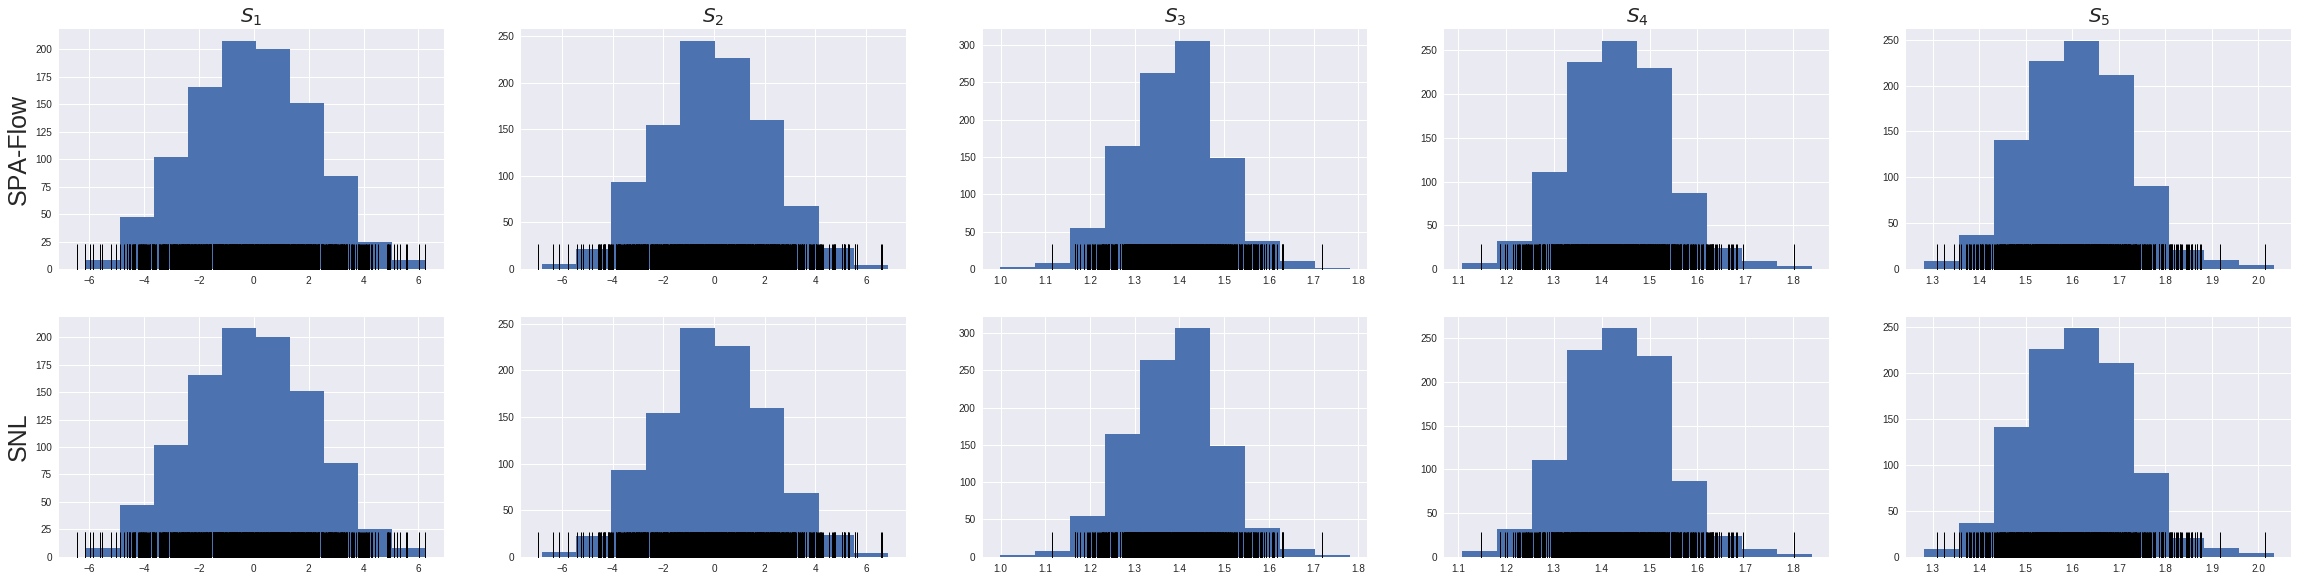

In [63]:

fig = plt.figure(figsize = (40,15))


ax1 = fig.add_subplot(3, 5, 1)
ax2 = fig.add_subplot(3, 5, 2)
ax3 = fig.add_subplot(3, 5, 3)
ax4 = fig.add_subplot(3, 5, 4)
ax5 = fig.add_subplot(3, 5, 5)

ax6 = fig.add_subplot(3, 5, 6)
ax7 = fig.add_subplot(3, 5, 7)
ax8 = fig.add_subplot(3, 5, 8)
ax9 = fig.add_subplot(3, 5, 9)
ax10 = fig.add_subplot(3, 5, 10)


ax1.hist(spa_flow_lik_prior[data_set][:,0])
ax1.plot(model_prior[data_set][:,0], [0.01]*len(spa_flow_lik[data_set][:,0]), '|', color='k', markersize = 50)

ax2.hist(spa_flow_lik_prior[data_set][:,1])
ax2.plot(model_prior[data_set][:,1], [0.01]*len(spa_flow_lik[data_set][:,0]), '|', color='k', markersize = 50)

ax3.hist(spa_flow_lik_prior[data_set][:,2])
ax3.plot(model_prior[data_set][:,2], [0.01]*len(spa_flow_lik[data_set][:,0]), '|', color='k', markersize = 50)

ax4.hist(spa_flow_lik_prior[data_set][:,3])
ax4.plot(model_prior[data_set][:,3], [0.01]*len(spa_flow_lik[data_set][:,0]), '|', color='k', markersize = 50)

ax5.hist(spa_flow_lik_prior[data_set][:,4])
ax5.plot(model_prior[data_set][:,4], [0.01]*len(spa_flow_lik[data_set][:,0]), '|', color='k', markersize = 50)

ax6.hist(spa_flow_lik_prior[data_set][:,0])
ax6.plot(model_prior[data_set][:,0], [0.01]*len(snl_lik[data_set][:,0]), '|', color='k', markersize = 50) # should be snl_lik

ax7.hist(spa_flow_lik_prior[data_set][:,1])
ax7.plot(model_prior[data_set][:,1], [0.01]*len(snl_lik[data_set][:,0]), '|', color='k', markersize = 50)

ax8.hist(spa_flow_lik_prior[data_set][:,2])
ax8.plot(model_prior[data_set][:,2], [0.01]*len(snl_lik[data_set][:,0]), '|', color='k', markersize = 50)

ax9.hist(spa_flow_lik_prior[data_set][:,3])
ax9.plot(model_prior[data_set][:,3], [0.01]*len(snl_lik[data_set][:,0]), '|', color='k', markersize = 50)

ax10.hist(spa_flow_lik_prior[data_set][:,4])
ax10.plot(model_prior[data_set][:,4], [0.01]*len(snl_lik[data_set][:,0]), '|', color='k', markersize = 50) #linewidths=1)

ax1.set_title(r'$S_1$',fontsize=20)
ax2.set_title(r'$S_2$',fontsize=20)
ax3.set_title(r'$S_3$',fontsize=20)
ax4.set_title(r'$S_4$',fontsize=20)
ax5.set_title(r'$S_5$',fontsize=20)
ax1.set_ylabel("SPA-Flow",fontsize=25)
ax6.set_ylabel("SNL",fontsize=25)

Mean abs error (Flow): 7.30341610725699e+16
Mean abs error (SPA): 9.308361725682554e+16


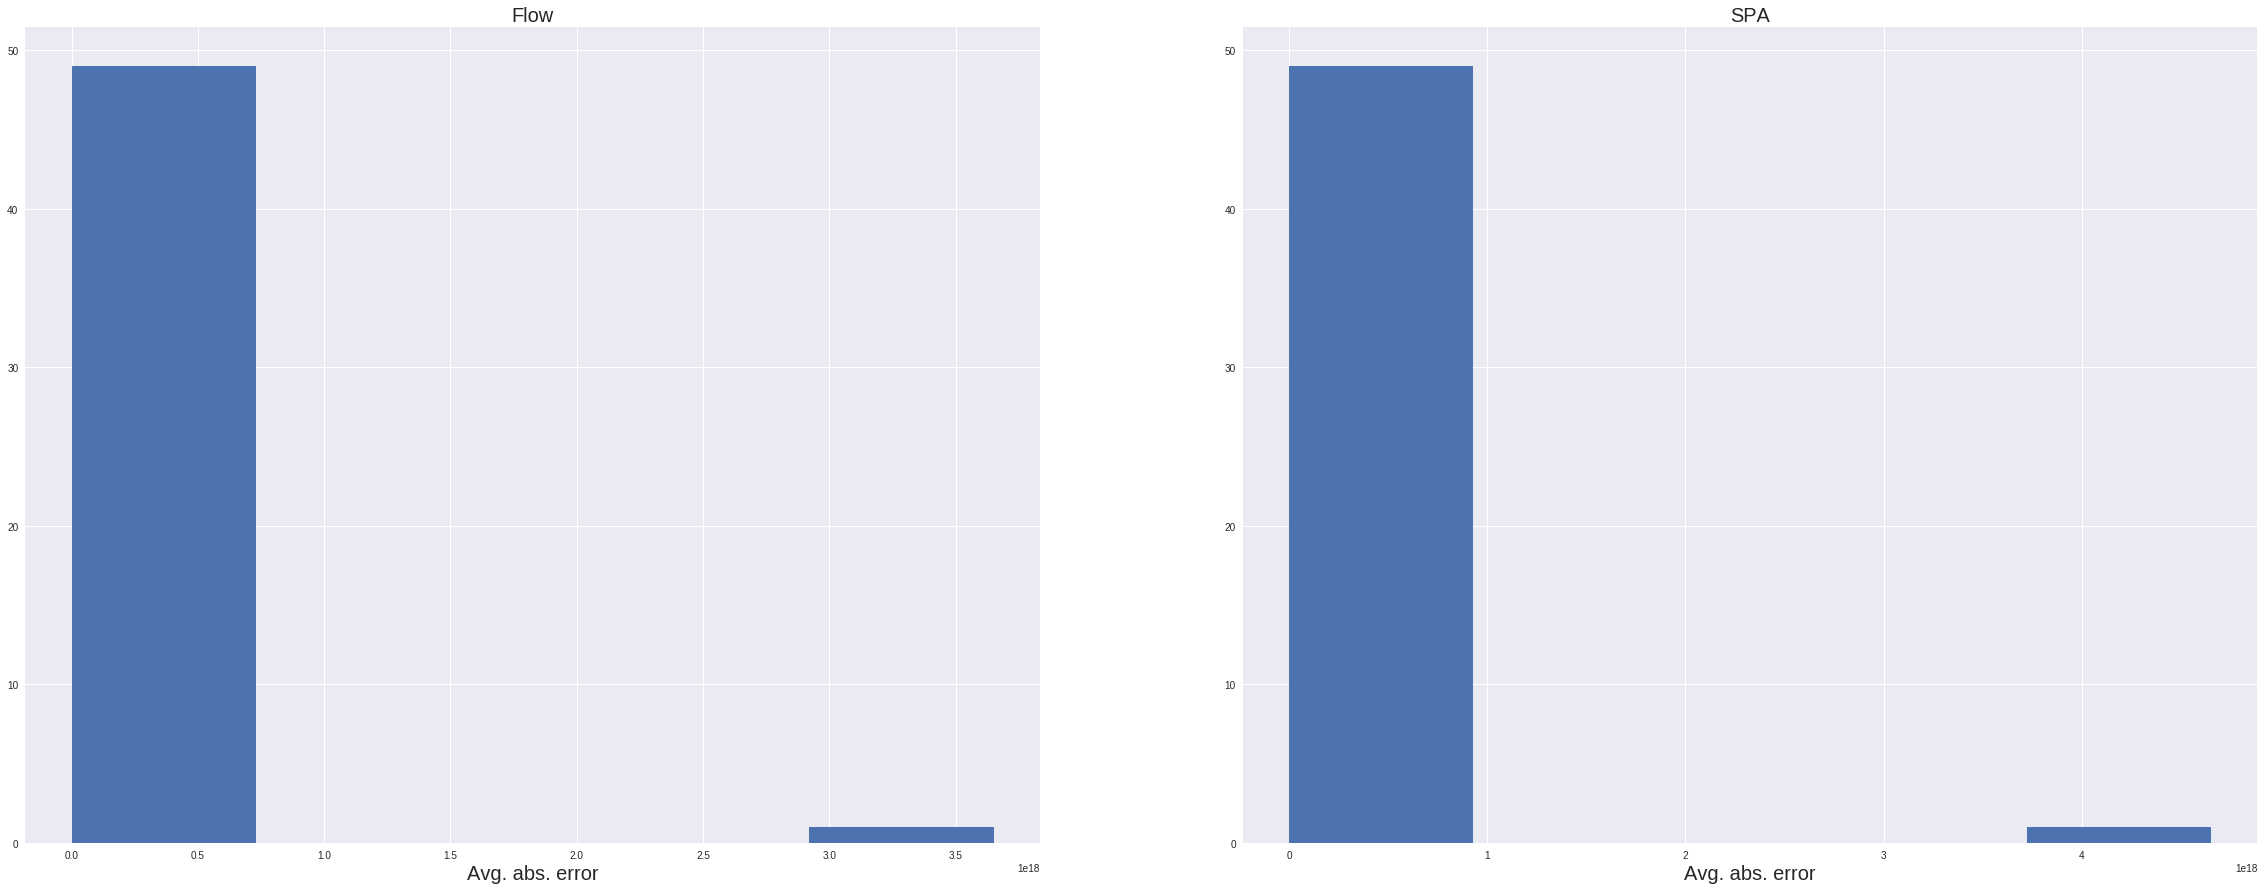

In [64]:
abs_error_per_data_set_flow = [] 
abs_error_per_data_set_spa = [] 

# I am not sure if this makes a lot of sense since the inference is cond on S(x_o) not  the sampled data sets!
for i in range(len(seed)):
    abs_error_per_data_set_flow.append(abs(model_prior[i] - spa_flow_lik_prior[i]).mean()) # this is correct since we now have the case where calc the error for the summary stats that we cond on
    abs_error_per_data_set_spa.append(abs(model_prior[i] - snl_lik_prior[i]).mean()) # should be snl_lik
    
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize = (40,15))


ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.hist(abs_error_per_data_set_flow,5)
ax1.set_title("Flow",fontsize=20)
ax1.set_xlabel("Avg. abs. error",fontsize=20)

ax2.hist(abs_error_per_data_set_spa,5)
ax2.set_title("SPA",fontsize=20)
ax2.set_xlabel("Avg. abs. error",fontsize=20)

print("Mean abs error (Flow): "  + str(np.array(abs_error_per_data_set_flow).mean().round(4)))
print("Mean abs error (SPA): "  + str(np.array(abs_error_per_data_set_spa).mean().round(4)))

Check like models for $\theta_{post}$

In [65]:
spa_flow_lik_post = []

for s in seed:
    p = 'low_dim_w_summary_stats/data/data_recon_post_spa_flow_' + str(dim) + '_' + str(s) + '_' + str(seed_data) + '.csv'
    spa_flow_lik_post.append(read_posterior_samples(p))

In [66]:
snl_lik_post = []

for s in seed:
    p = 'low_dim_w_summary_stats/data/data_recon_post_snl_' + str(dim) + '_' + str(s) + '_' + str(seed_data) + '.csv'
    snl_lik_post.append(read_posterior_samples(p))

In [67]:
model_post = []

for s in seed:
    p = 'low_dim_w_summary_stats/data/x_summary_stats_samples_post_pred_' + str(dim) + '_' + str(s) + '_' + str(seed_data) + '.csv'
    model_post.append(read_posterior_samples(p))

In [69]:
spa_flow_lik_post[0].shape

(1000, 5)

In [70]:
model_post[0].shape

(1000, 5)

Text(0,0.5,'SNL')

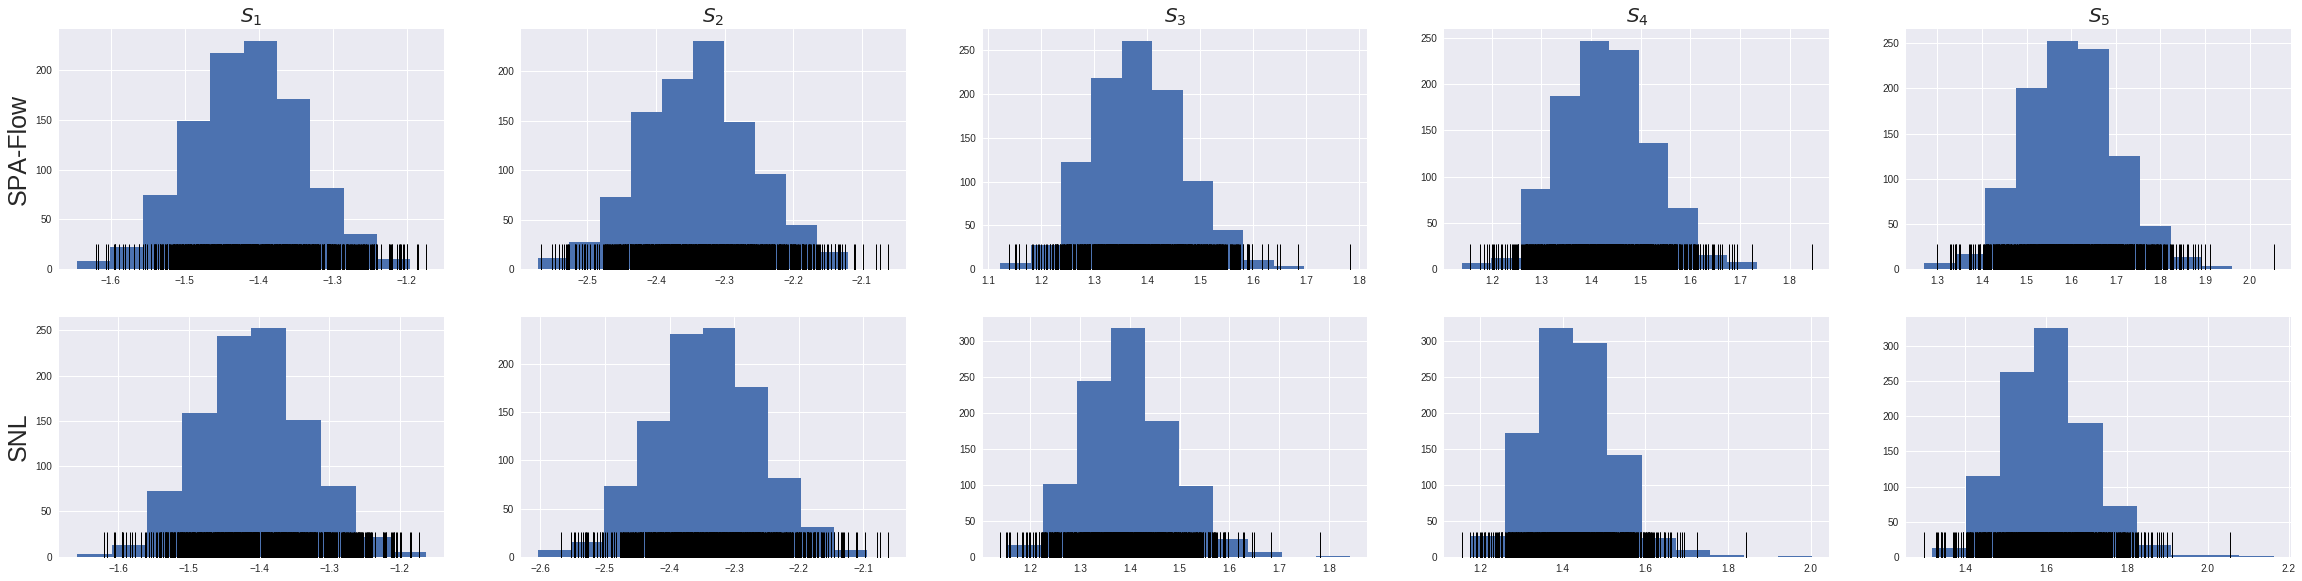

In [78]:

fig = plt.figure(figsize = (40,15))


ax1 = fig.add_subplot(3, 5, 1)
ax2 = fig.add_subplot(3, 5, 2)
ax3 = fig.add_subplot(3, 5, 3)
ax4 = fig.add_subplot(3, 5, 4)
ax5 = fig.add_subplot(3, 5, 5)

ax6 = fig.add_subplot(3, 5, 6)
ax7 = fig.add_subplot(3, 5, 7)
ax8 = fig.add_subplot(3, 5, 8)
ax9 = fig.add_subplot(3, 5, 9)
ax10 = fig.add_subplot(3, 5, 10)

# here we can use wasserstein 

ax1.hist(spa_flow_lik_post[data_set][:,0])
ax1.plot(model_post[data_set][:,0], [0.01]*len(spa_flow_lik[data_set][:,0]), '|', color='k', markersize = 50)

ax2.hist(spa_flow_lik_post[data_set][:,1])
ax2.plot(model_post[data_set][:,1], [0.01]*len(spa_flow_lik[data_set][:,0]), '|', color='k', markersize = 50)

ax3.hist(spa_flow_lik_post[data_set][:,2])
ax3.plot(model_post[data_set][:,2], [0.01]*len(spa_flow_lik[data_set][:,0]), '|', color='k', markersize = 50)

ax4.hist(spa_flow_lik_post[data_set][:,3])
ax4.plot(model_post[data_set][:,3], [0.01]*len(spa_flow_lik[data_set][:,0]), '|', color='k', markersize = 50)

ax5.hist(spa_flow_lik_post[data_set][:,4])
ax5.plot(model_post[data_set][:,4], [0.01]*len(spa_flow_lik[data_set][:,0]), '|', color='k', markersize = 50)

ax6.hist(snl_lik_post[data_set][:,0])
ax6.plot(model_post[data_set][:,0], [0.01]*len(snl_lik[data_set][:,0]), '|', color='k', markersize = 50) # should be snl_lik

ax7.hist(snl_lik_post[data_set][:,1])
ax7.plot(model_post[data_set][:,1], [0.01]*len(snl_lik[data_set][:,0]), '|', color='k', markersize = 50)

ax8.hist(snl_lik_post[data_set][:,2])
ax8.plot(model_post[data_set][:,2], [0.01]*len(snl_lik[data_set][:,0]), '|', color='k', markersize = 50)

ax9.hist(snl_lik_post[data_set][:,3])
ax9.plot(model_post[data_set][:,3], [0.01]*len(snl_lik[data_set][:,0]), '|', color='k', markersize = 50)

ax10.hist(snl_lik_post[data_set][:,4])
ax10.plot(model_post[data_set][:,4], [0.01]*len(snl_lik[data_set][:,0]), '|', color='k', markersize = 50) #linewidths=1)

ax1.set_title(r'$S_1$',fontsize=20)
ax2.set_title(r'$S_2$',fontsize=20)
ax3.set_title(r'$S_3$',fontsize=20)
ax4.set_title(r'$S_4$',fontsize=20)
ax5.set_title(r'$S_5$',fontsize=20)
ax1.set_ylabel("SPA-Flow",fontsize=25)
ax6.set_ylabel("SNL",fontsize=25)

Mean abs error (Flow): 0.0885
Mean abs error (SPA): 0.0892


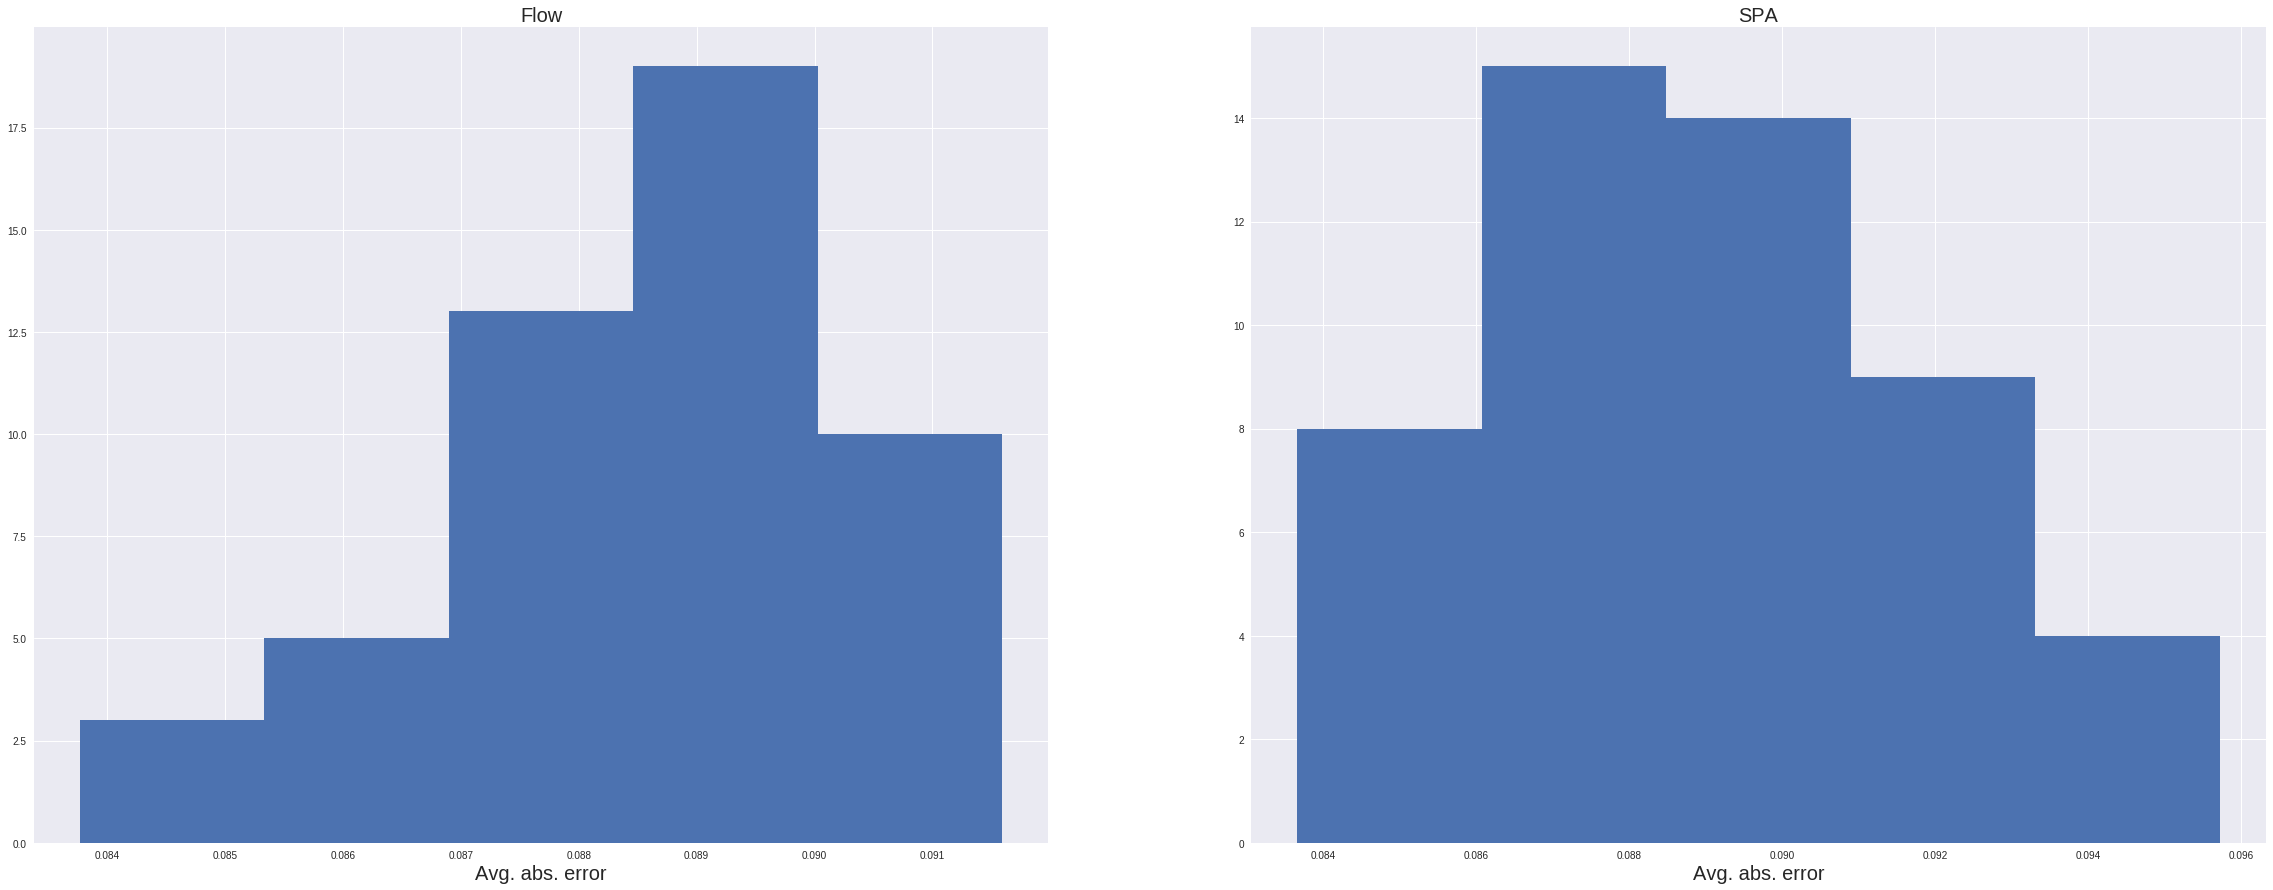

In [79]:
abs_error_per_data_set_flow = [] 
abs_error_per_data_set_spa = [] 

# I am not sure if this makes a lot of sense since the inference is cond on S(x_o) not  the sampled data sets!
for i in range(len(seed)):
    abs_error_per_data_set_flow.append(abs(model_post[i] - spa_flow_lik_post[i]).mean()) # this is correct since we now have the case where calc the error for the summary stats that we cond on
    abs_error_per_data_set_spa.append(abs(model_post[i] - snl_lik_post[i]).mean()) # should be snl_lik
    
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize = (40,15))


ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.hist(abs_error_per_data_set_flow,5)
ax1.set_title("Flow",fontsize=20)
ax1.set_xlabel("Avg. abs. error",fontsize=20)

ax2.hist(abs_error_per_data_set_spa,5)
ax2.set_title("SPA",fontsize=20)
ax2.set_xlabel("Avg. abs. error",fontsize=20)

print("Mean abs error (Flow): "  + str(np.array(abs_error_per_data_set_flow).mean().round(4)))
print("Mean abs error (SPA): "  + str(np.array(abs_error_per_data_set_spa).mean().round(4)))